In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-clients/default_of_credit_card_clients__courseware_version_1_21_19.xls


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams["figure.dpi"] = 200

In [3]:
pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# 1. Introduction


In this guided project, we'll work with the dataset from [ UCI Default of Credit Card Clients Dataset ](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

### 1.1. The Business Problem
Our client is a credit card company. They have brought us a dataset that includes
some demographics and recent financial data, over the past 6 months, for a sample
of 30,000 of their account holders. This data is at the credit account level; in other
words, there is one row for each account (you should always clarify what the
definition of a row is, in a dataset). Rows are labeled by whether, in the next month
after the 6-month historical data period, an account owner has defaulted, or in other
words, failed to make the minimum payment


### 1.2. Goal
Our goal is to develop a predictive model for whether an account will default next
month, given demographics and historical data.


### 1.3. Preview datasets
* The columns in the dataset are:

|Index|Column name|Description|
|:----|:----|:----|
|0|`ID`|An id used to identify the client of the company|
|1|`LIMIT_BAL`|Amount of credit provided (in New Taiwanese (NT) dollar)|
|2|`SEX`| Gender (1 = male; 2 = female)|
|3|`EDUCATION`|Education (1 = graduate school; 2 = university; 3 = high school; 4= others)|
|4|`MARRIAGE`| Marital status (1 = married; 2 = single; 3 = others)|
|5|`AGE`| Age (year)|
|6|`PAY_1–PAY_6`| A record of past payments. Past monthly payments, recorded from April to September, are stored in these columns|
|7|`BILL_AMT1–BILL_AMT6`| Bill statement amount (in NT dollar)|
|8|`PAY_AMT1–PAY_AMT6`| Amount of previous payment (NT dollar)|






* Note that: 

    * ***PAY_1*** represents the repayment status in September; ***PAY_2*** is the repayment status in August; and so on up to ***PAY_6***, which represents the repayment status in April. The measurement scale for the repayment status is as follows: -1 = pay duly; 1 =
payment delay for 1 month; 2 = payment delay for 2 months; and so on up to 8 =
payment delay for 8 months; 9 = payment delay for 9 months and above.

    * ***BILL_AMT1*** represents the bill statement amount in September; ***BILL_AMT2*** represents the bill statement amount in August; and so on up to BILL_AMT6, which represents the bill statement amount in April.
    
    * ***PAY_AMT1*** represents the amount paid in September; ***PAY_AMT2*** represents the amount paid in August; and so on up to ***PAY_AMT6***, which represents the amount paid in April.

### 

# 2. Loading the Data

In [4]:
df = pd.read_excel("../input/credit-card-clients/default_of_credit_card_clients__courseware_version_1_21_19.xls")

In [5]:
df.shape

(30000, 25)

In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
df[:5]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## a. Checking the id column

* Because the ID column looks like they only have the unique values, so we will checkt this column

In [8]:
df["ID"].value_counts().value_counts()

1    29374
2      313
Name: ID, dtype: int64

In [9]:
id_counts = df["ID"].value_counts()
id_counts

ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
                ..
2edeb3a6-d38d    1
27e11893-92e9    1
2b1c282b-441e    1
bd737997-0eb0    1
15d69f9f-5ad3    1
Name: ID, Length: 29687, dtype: int64

In [10]:
dup_id_mask = id_counts == 2
dup_id_mask.value_counts()

False    29374
True       313
Name: ID, dtype: int64

In [11]:
# Getting the duplicated ids
dup_ids = id_counts.index[dup_id_mask]
type(dup_ids)

pandas.core.indexes.base.Index

In [12]:
# Converting this to the type list
dup_ids = list(dup_ids)
dup_ids[:5]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

In [13]:
# Getting the rows that have the first 3 duplicated ids from the dup_ids list
df.loc[df["ID"].isin(dup_ids[:3]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* As we can see from the DF above, some rows that have duplicated ids only have zero elements ---> we should delete these rows

## b. Deleting the zero rows

In [14]:
df_zero_mask = df == 0

In [15]:
df_zero_mask.loc[df["ID"].isin(dup_ids[:3]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
5133,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
16727,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,False,True,False
16827,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
29685,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
29785,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [16]:
# Getting the boolean mask of rows that have zero elements
zero_row_mask = df_zero_mask.iloc[:,1:].all(axis = 1)
zero_row_mask.value_counts()

False    29685
True       315
dtype: int64

In [17]:
df_clean_1 = df.loc[~zero_row_mask,:].copy()

In [18]:
df_clean_1["ID"].value_counts().value_counts()

1    29685
Name: ID, dtype: int64

In [19]:
# Saving this dataframe: . Notice we don't include the index of the DataFrame when
# saving, as this is not necessary and can create extra columns when we load it later:
df_clean_1.to_csv("df_clean_1.csv", index = False)

## c. Exploring and Cleaning the Data

In [20]:
df_clean_1 =  pd.read_csv("./df_clean_1.csv")

In [21]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29685 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

* What we can see from here is that, the type of PAY_1 is a string wheres most of other features have the type int ---> We should check this feature

In [22]:
df_clean_1["PAY_1"].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

* We need to delete the rows that have "Not available" value

In [23]:
is_Not_available = df_clean_1["PAY_1"] == "Not available"

In [24]:
is_Not_available.value_counts()

False    26664
True      3021
Name: PAY_1, dtype: int64

In [25]:
df_clean_2 = df_clean_1.loc[~is_Not_available,:].copy()

In [26]:
df_clean_2["PAY_1"].value_counts()

0     13087
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: PAY_1, dtype: int64

In [27]:
# Converting the type of this column to int
df_clean_2["PAY_1"] = df_clean_2["PAY_1"].astype("int64")

In [28]:
df_clean_2[["PAY_1", "PAY_2"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29684
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


In [29]:
# Saving df_clean_2 to a csv file
df_clean_2.to_csv("df_clean_2.csv", index = False)

# 3. Data Quality Assurance and Exploration

In [30]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

* Take a look at the first five columns of data. ng at the .info() summary. Let's now take a look at the first few columns of
data. Before we get to the historical bill payments, we have the credit limits of the ***LIMIT_BAL*** accounts, and the ***SEX, EDUCATION, MARRIAGE***, and ***AGE*** demographic features.We are not going to use the gender feature to predict credit-worthiness, as this is unethical by their standards. So we keep this in mind for future reference. Now we'll explore the rest of these columns, making any corrections that are necessary.

## a. Exploring the credit limit and demographic features

#### a.1. Exploring the non categorical features

In [31]:
df_clean_2 = pd.read_csv("./df_clean_2.csv")

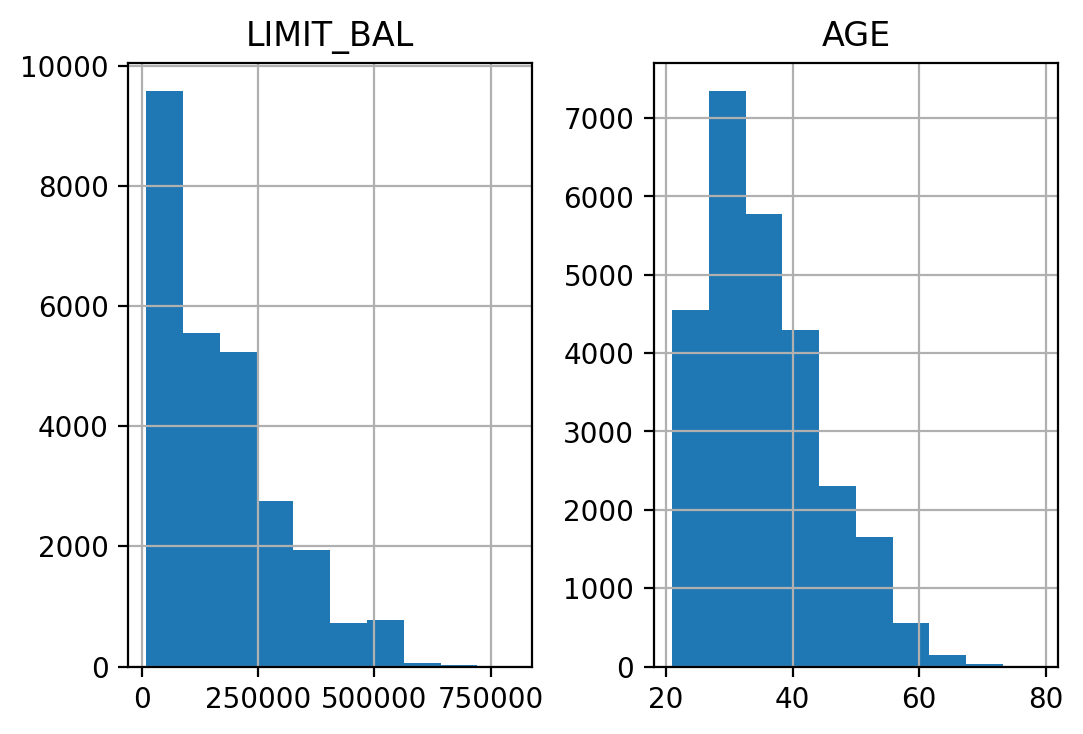

In [32]:
df_clean_2[["LIMIT_BAL", "AGE"]].hist()
mpl.rcParams["figure.dpi"] = 400
plt.show()

In [33]:
# Getting the summary statistic of these two columns
df_clean_2[["LIMIT_BAL", "AGE"]].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


* We can make sime judgments here:

    * **LIMIT_BAL**, the credit limit, seems to make sense. The credit limits have a minimum of 10,000. This dataset is from Taiwant; the exact unit of currency(NT dollar) may not be familiar, but intuitively, a credit limit should be above 0

    * The **AGE** feature also looks reasonably distributed, with no one under the age of 21 having a credit account

#### a.2. Exploring the categorical features

In [34]:
df_clean_2["EDUCATION"].value_counts().sort_index()

0       11
1     9412
2    12458
3     4380
4      115
5      245
6       43
Name: EDUCATION, dtype: int64

Here, we see undocumented education levels 0, 5, and 6, as the data
dictionary describes only Education (1 = graduate school; 2 =
university; 3 = high school; 4 = others). Our business partner
tells us they don't know about the others. Since they are not very prevalent, we
will lump them in with the others category, which seems appropriate

In [35]:
df_clean_2["EDUCATION"].replace(to_replace = [0, 5, 6], value = 4, inplace = True)

In [36]:
df_clean_2["EDUCATION"].value_counts().sort_index()

1     9412
2    12458
3     4380
4      414
Name: EDUCATION, dtype: int64

In [37]:
# Now for the MARRIAGE column
df_clean_2["MARRIAGE"].value_counts().sort_index()

0       48
1    12172
2    14158
3      286
Name: MARRIAGE, dtype: int64

In [38]:
df_clean_2["MARRIAGE"].replace(to_replace = 0, value = 3, inplace = True)

In [39]:
df_clean_2["MARRIAGE"].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

In [40]:
# Saving the progress
df_clean_2.to_csv("df_clean_2_01.csv", index = False)

## b. DEEP DIVE: CATEGORICAL FEATURES
Machine learning algorithms only work with numbers. If your data contains text
features, for example, these would require transformation to numbers in some way.
We learned above that the data for our case study is, in fact, entirely numerical.
However, it's worth thinking about how it got to be that way. In particular, consider
the ***EDUCATION*** feature.

In [41]:
df_clean_2 = pd.read_csv("./df_clean_2_01.csv")

In [42]:
df_clean_2["EDUCATION"].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [43]:
# Now we want to see how many samples in each education level are default
grouped = df_clean_2.groupby("EDUCATION")["default payment next month"]

In [44]:
means = grouped.mean()
means

EDUCATION
1    0.193901
2    0.235913
3    0.255479
4    0.074879
Name: default payment next month, dtype: float64

In [45]:
type(means)

pandas.core.series.Series

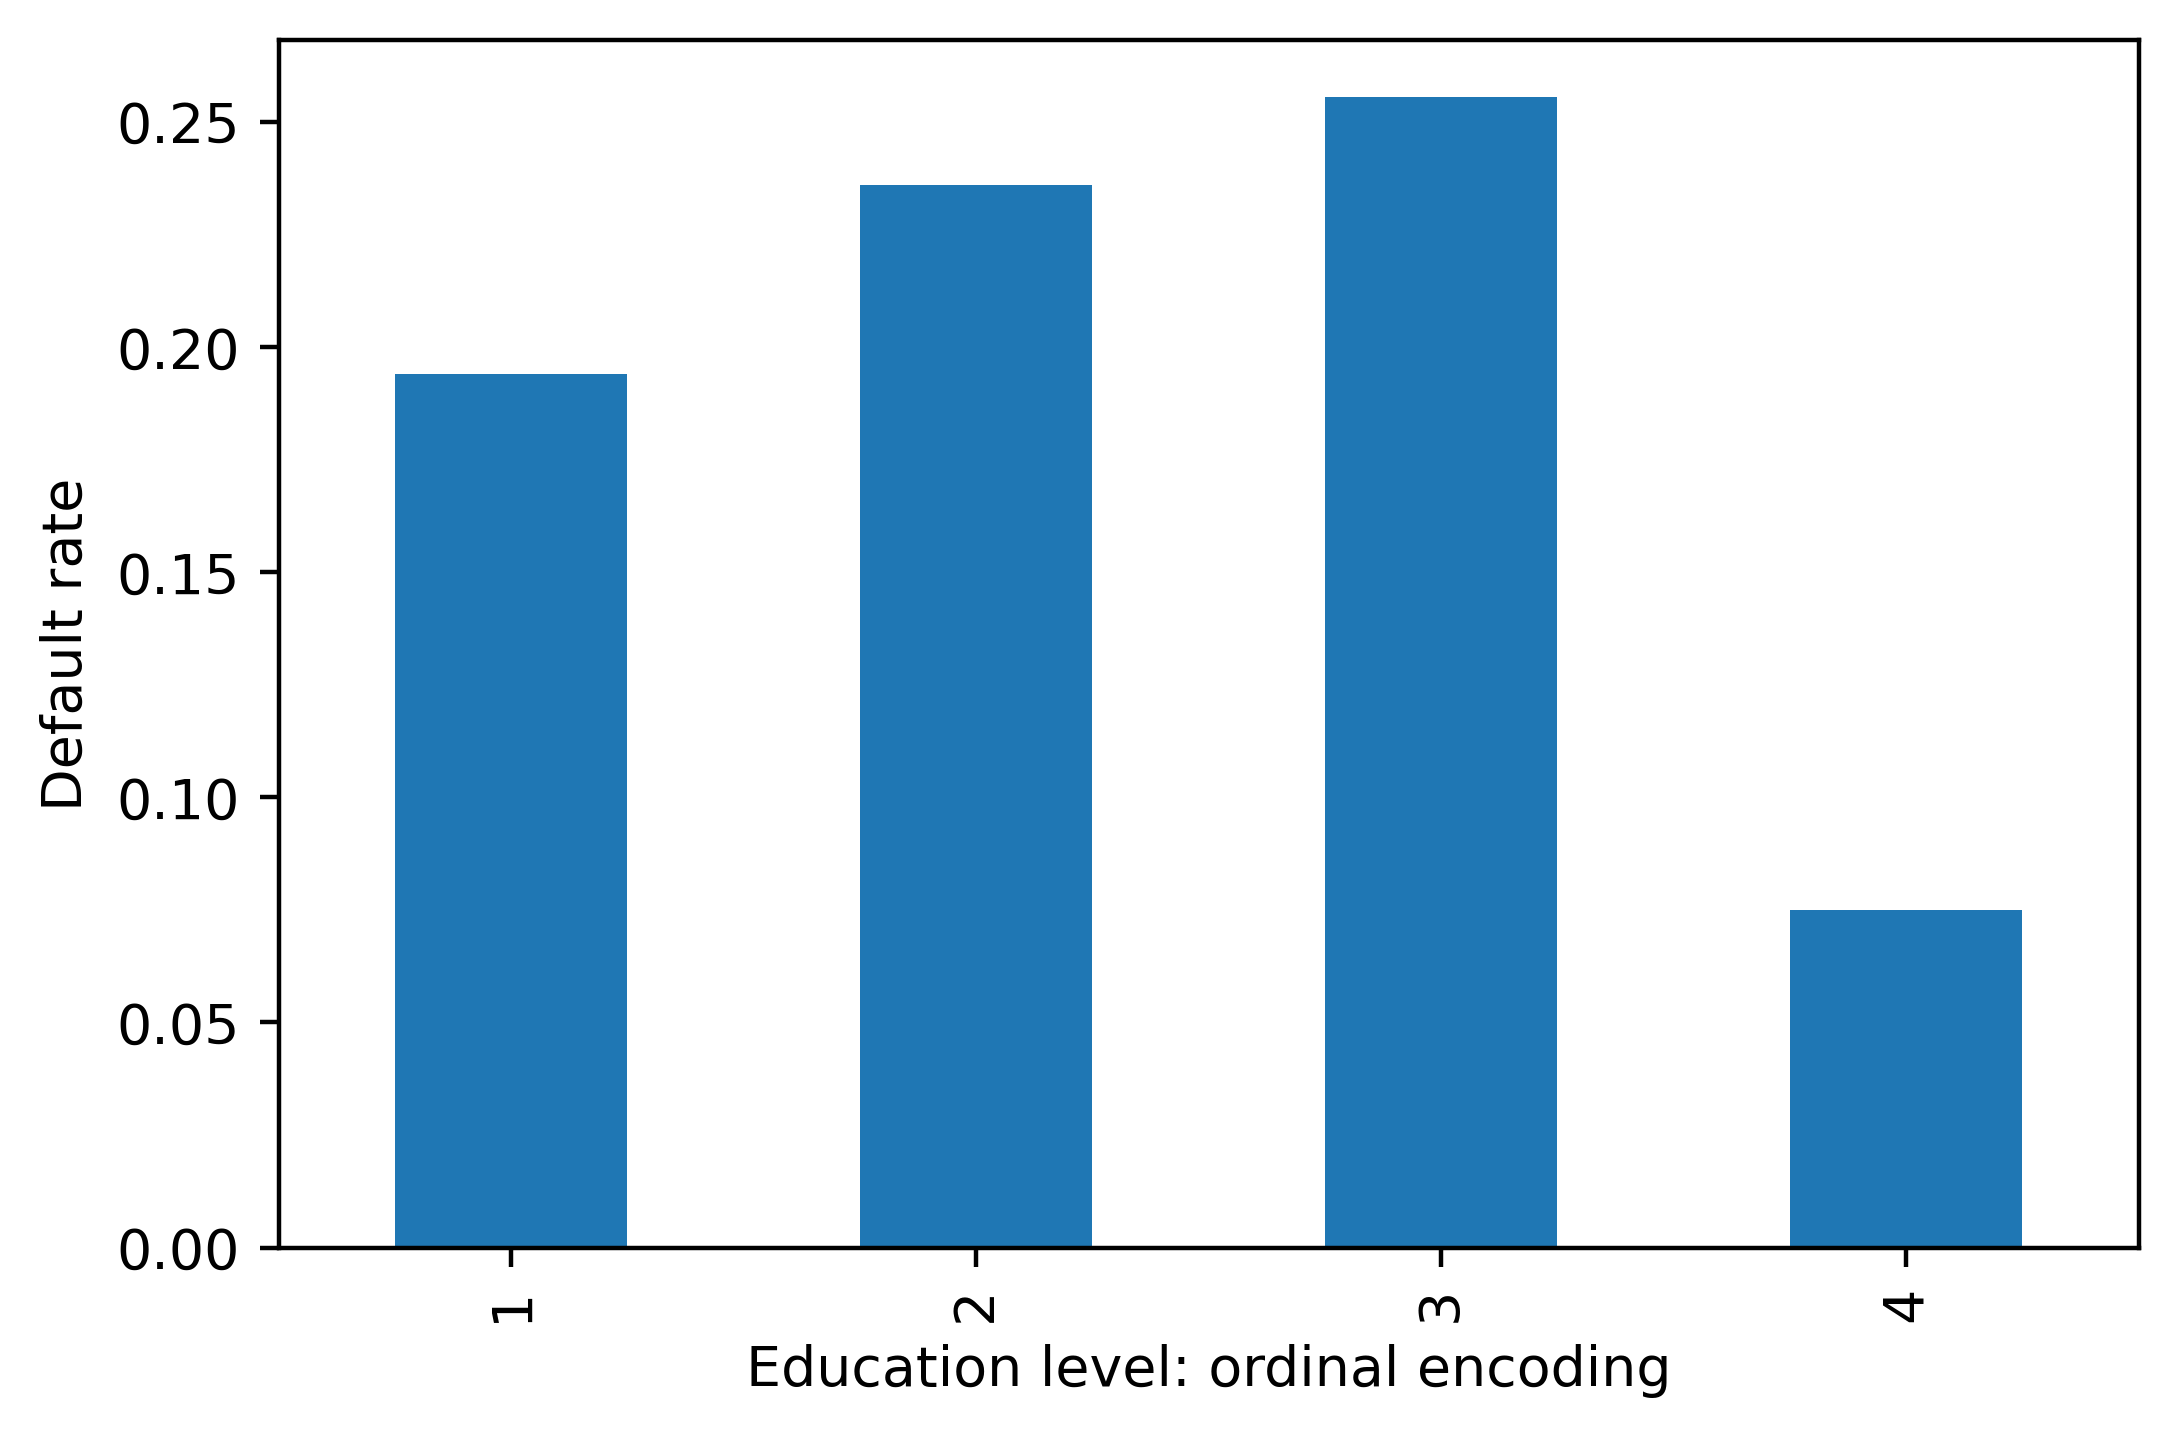

In [46]:
#Plotting a diagram
means.plot(kind = "bar", xlabel = "Education level: ordinal encoding", ylabel = "Default rate")
plt.show()

It looks like a straight-line fit would probably not
be the best description of the data here. In case a feature has a non-linear effect
like this, it may be better to use a more complex algorithm such as a **decision tree**
or **random forest**. Or, if a simpler and more interpretable linear model such as
logistic regression is desired, we could avoid an ordinal encoding and use a different
way of encoding categorical variables. A popular way of doing this is called **one-hot
encoding (OHE)**

In [47]:
# Apply One Hot Encoding for this feature
df_clean_2["EDUCATION_CAT"] = "None"

In [48]:
df_clean_2[["EDUCATION", "EDUCATION_CAT"]][:5]

,EDUCATION,EDUCATION_CAT
0,2,None
1,2,None
2,2,None
3,2,None
4,2,None


In [49]:
cat_mapping = {1: "graduate school",
               2: "university",
               3: "high school",
               4: "others"}

df_clean_2["EDUCATION_CAT"] = df_clean_2["EDUCATION"].map(cat_mapping)

In [50]:
df_clean_2[["EDUCATION", "EDUCATION_CAT"]][:10]

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [51]:
# Creating an ohe df
edu_ohe = pd.get_dummies(df_clean_2["EDUCATION_CAT"])
edu_ohe.head()

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [52]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis = 1)

In [53]:
df_with_ohe.to_csv("Chapter_1_cleaned_data.csv", index = False)

# 4. Exploring The Financial History Features In the Dataset

In [54]:
df = pd.read_csv("./Chapter_1_cleaned_data.csv")

In [55]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

* The remaining features to be examined are the financial history features. They fall  naturally into three groups:
  
  * the status of the monthly paments for the last 6 months(ex: PAY_1)
  * The billed
  * The paid amounts for the same period
  

* First, let's look at the payment statuses

## a. Exploring the payment statuses

In [56]:
pay_features = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [57]:
df[pay_features].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


* Here, we observe that: the range of values is the same for all of features: -2, -1, 0,...8. It appears that the value of 9, decribed in the data dictionary as ***payment delay for nine months and above***, is never observed

In [58]:
# Look at the PAY_1 feature
df[pay_features[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

* Here, we can see that most of the accounts have the values -2, -1 or 0, which correspond to an account that was in good standing last month: not used, paid in full, or made at least the minimum payment

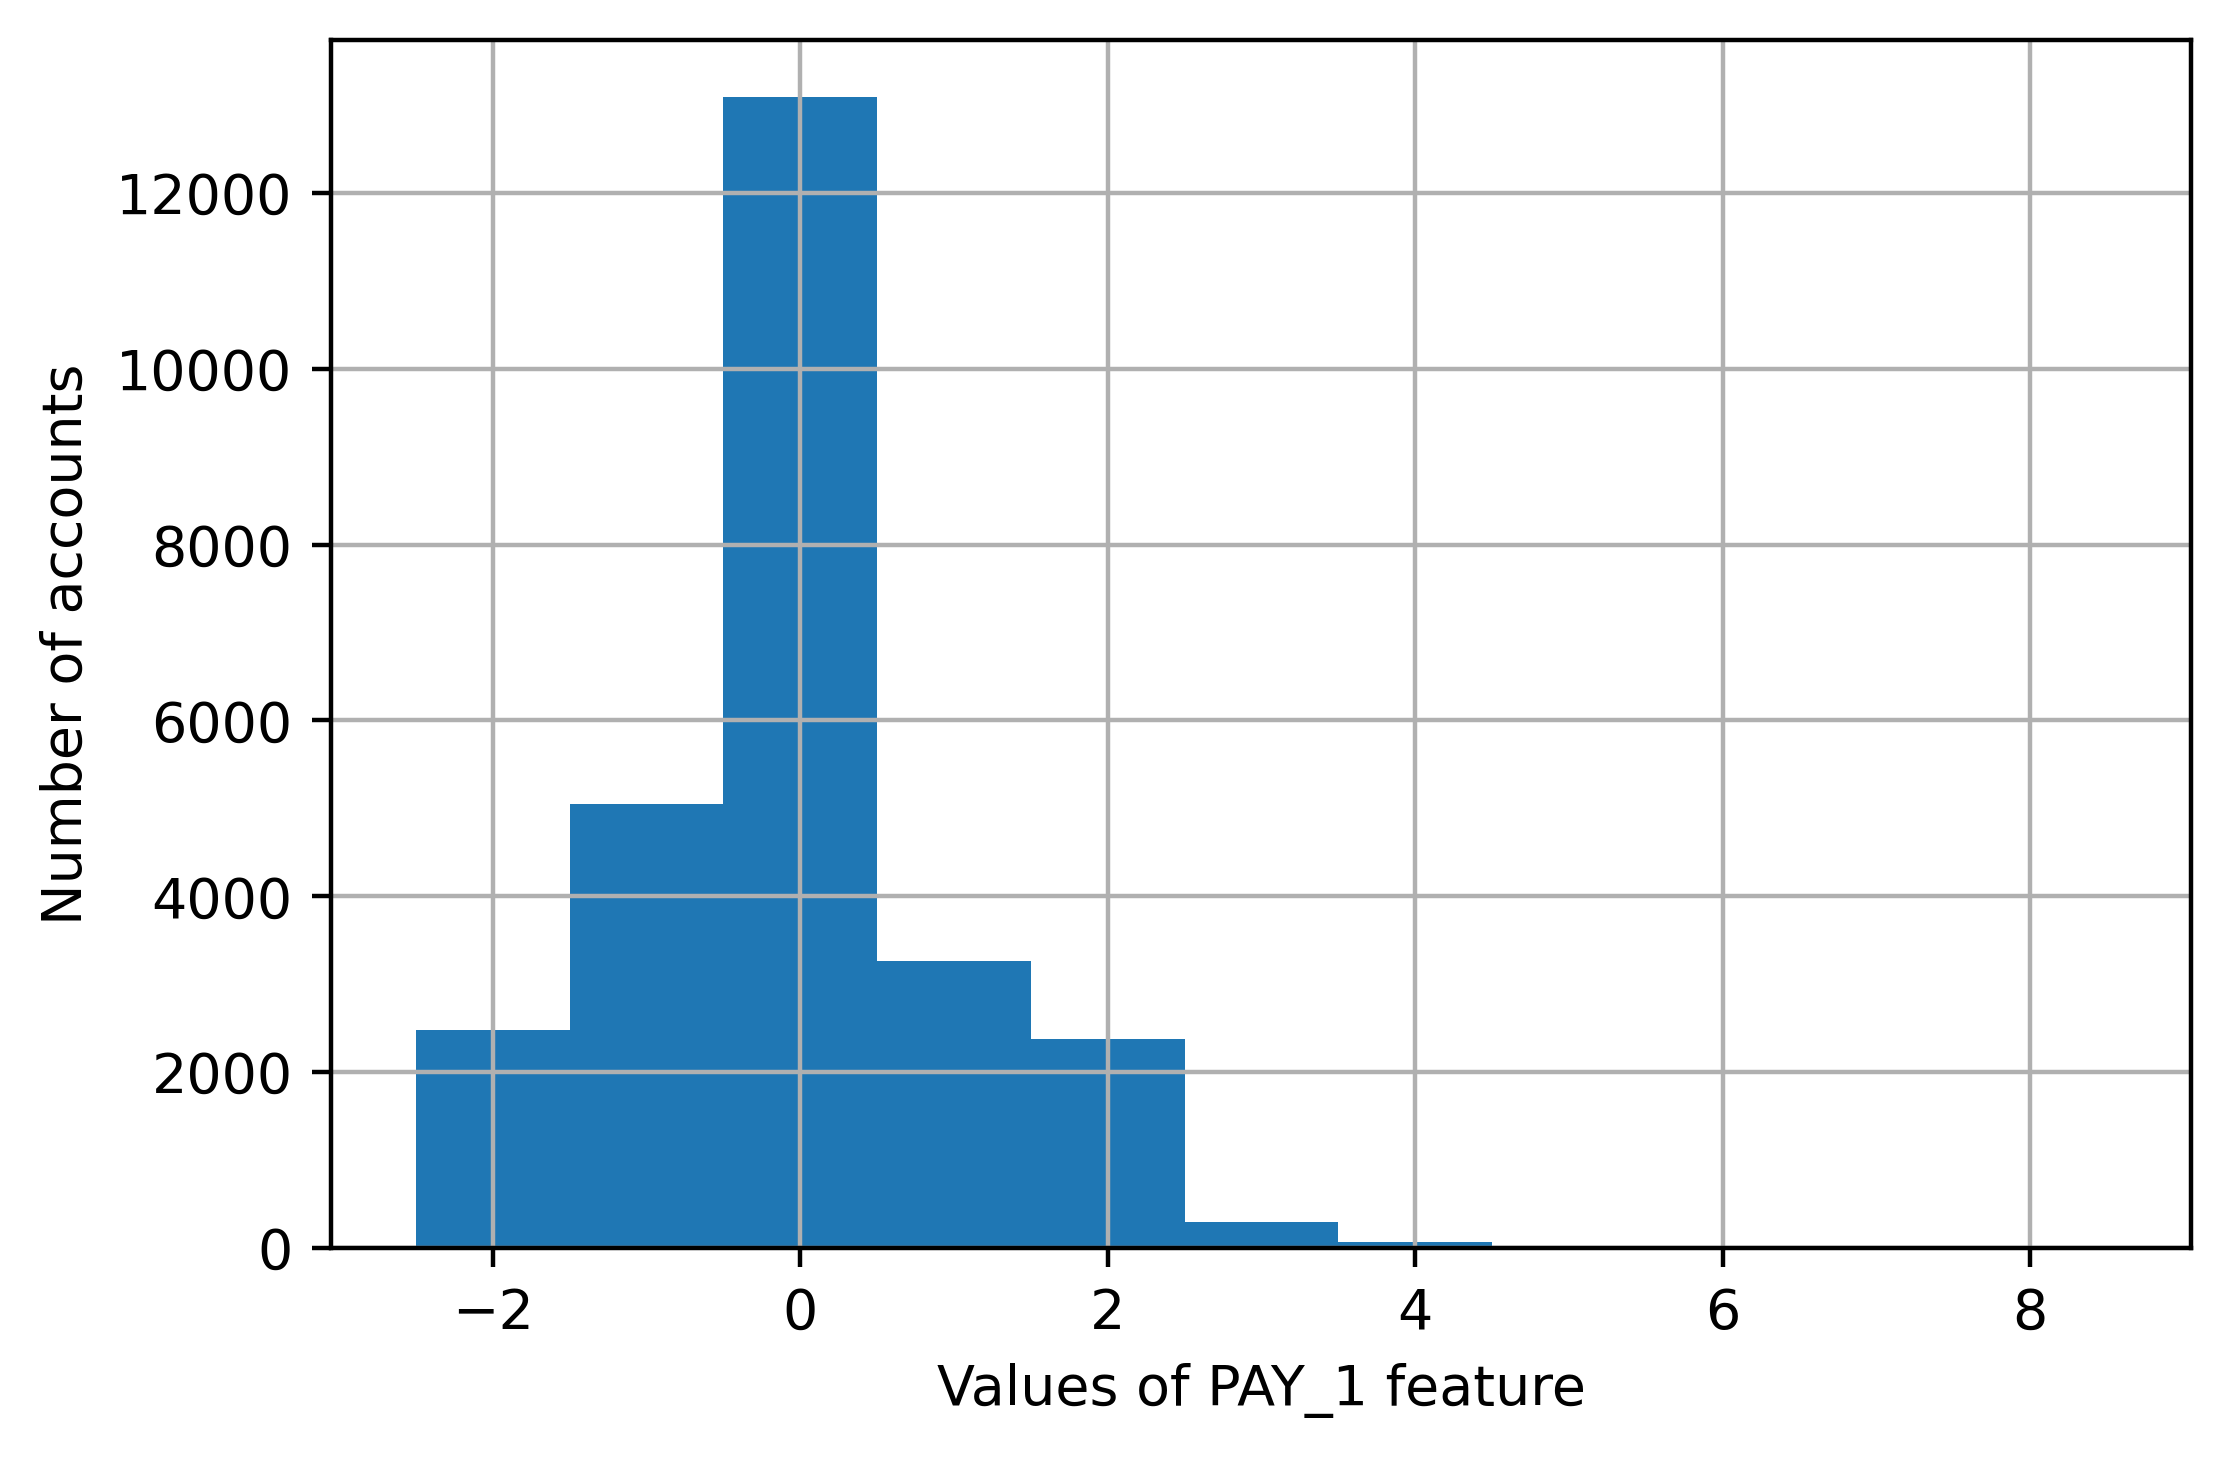

In [59]:
# Plotting the histogram for the PAY_1 features
pay_1_bins = np.array(range(-2, 10)) -0.5
df[pay_features[0]].hist(bins = pay_1_bins)

plt.xlabel("Values of PAY_1 feature")
plt.ylabel("Number of accounts")
plt.show()

**What have we learned from this data visualization?**

Since we already looked at the value counts, this confirms for us that most accounts
are in good standing (values -2, -1, and 0). For those that aren't, it's more common for
the "months late" to be a smaller number. This makes sense; likely, most people are
paying off their balances before too long. Otherwise, their account may be closed or
sold to a collection agency. 

**Plotting multiple hostograms together, and visulaize the payment status features for each of the last 6 months**

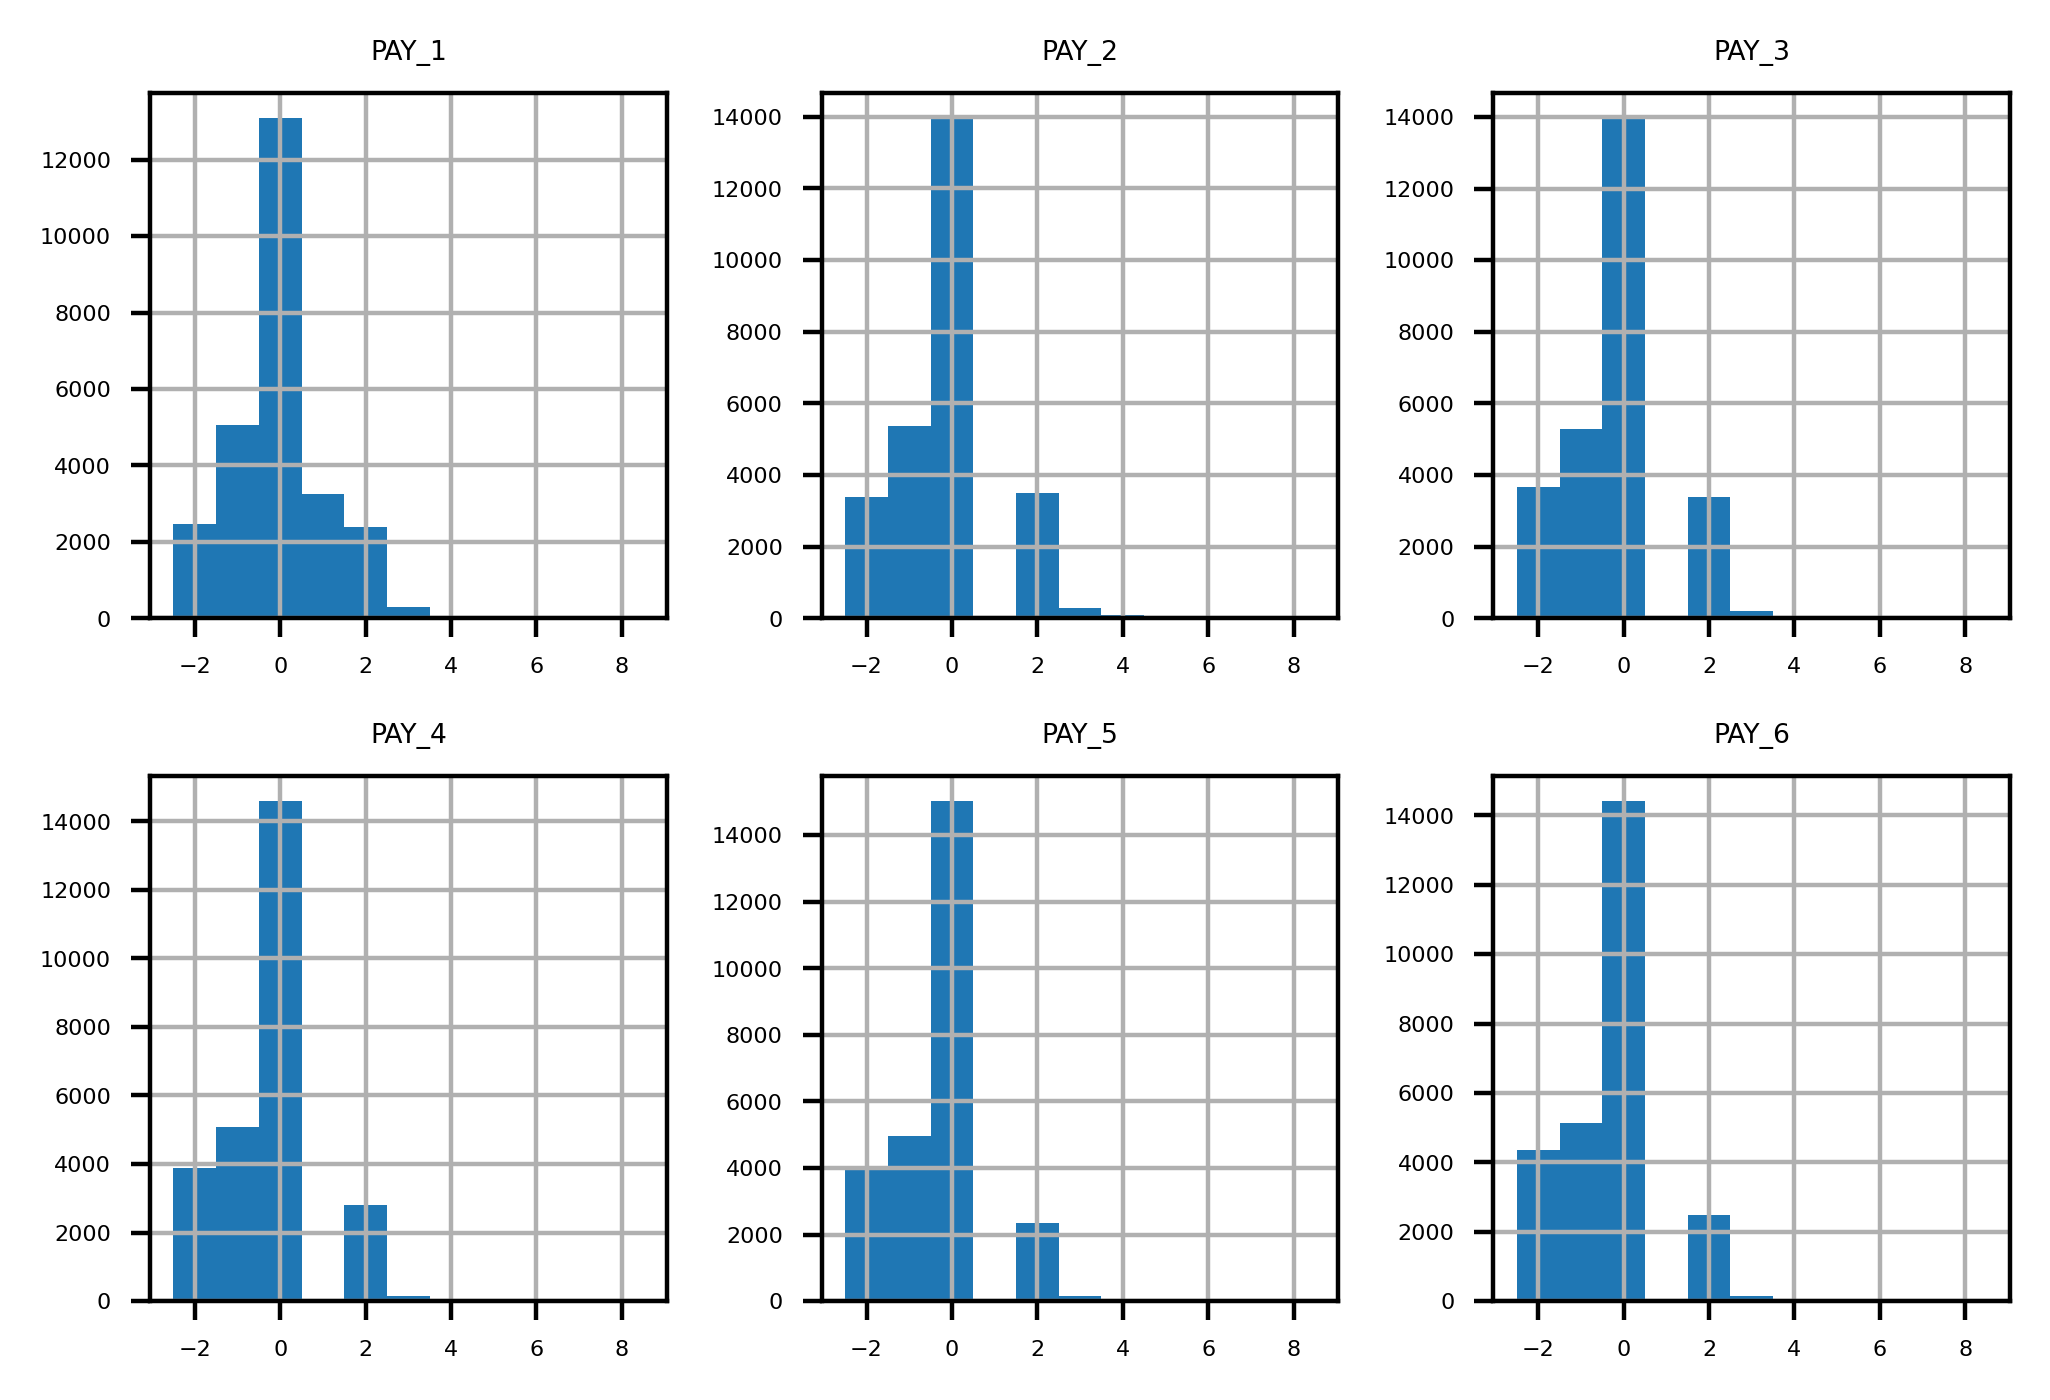

In [60]:
mpl.rcParams["font.size"] = 4
df[pay_features].hist(bins = pay_1_bins, layout = (2,3))
plt.show()

* We've already seen the first of these, and it makes sense. What about the rest of
them? Remember the definitions of the positive integer values of these features, and
what each feature means. For example, **PAY_2** is the repayment status in August, **PAY_3** is the repayment status in July, and the others go further back in time. A value of 1 means a payment delay for 1 month, while a value of 2 means a payment delay for 2 months, and so forth.


* However, something doesn't seem right. Consider the values between July **(PAY_3)** and August **(PAY_2)**. In July, there are very few 
accounts that had a 1-month payment delay; this bar is not really visible in the histogram. However, in August, there are suddenly thousands 
of accounts with a 2-month payment delay. This does not make sense: the number of accounts with a 2-month delay in a given month
should be less than or equal to the number of accounts with a 1-month delay in the previous month.

* let's take a closer look at accounts with a 2-month delay in August and see that the payment status was in july

In [61]:
df.loc[df["PAY_2"] == 2, ["PAY_2", "PAY_3"]].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


* It's clear that accounts with a 2-month delay in August have
nonsensical values for the July payment status. The only way to progress to a 2-month
delay should be from a 1-month delay the previous month, yet none of these
accounts indicate that.

* Because of this, only the most recent month of our payment status data is correct.
This means that, of all the payment status features, only **PAY_1** is representative of
future data, those that will be used to make predictions with the model we develop.
This is a key point: a predictive model relies on getting the same kind of data to make
predictions as it was built with. This means we can use **PAY_1** as a feature in our
model, but not **PAY_2** or the other payment status features from previous months

## b. Exploring the reamaining features in the dataset

In [62]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [63]:
# Examine statistical summaries of the bill amount features
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


* We see that the average monthly bill is roughly 40,000 to 50,000 NT dollars. You are encouraged to examine the conversion rate to your local currency. For example, 1 US dollar ~= 30 NT dollars. 

* We also notice there are some negative bill amounts. This seems reasonable because of the possible overpayment of the previous month's bill, perhaps in
anticipation of a purchase that would show up on the current month's bill. A scenario like this would leave that account with a negative balance, in the sense
of a credit to the account holder.

array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

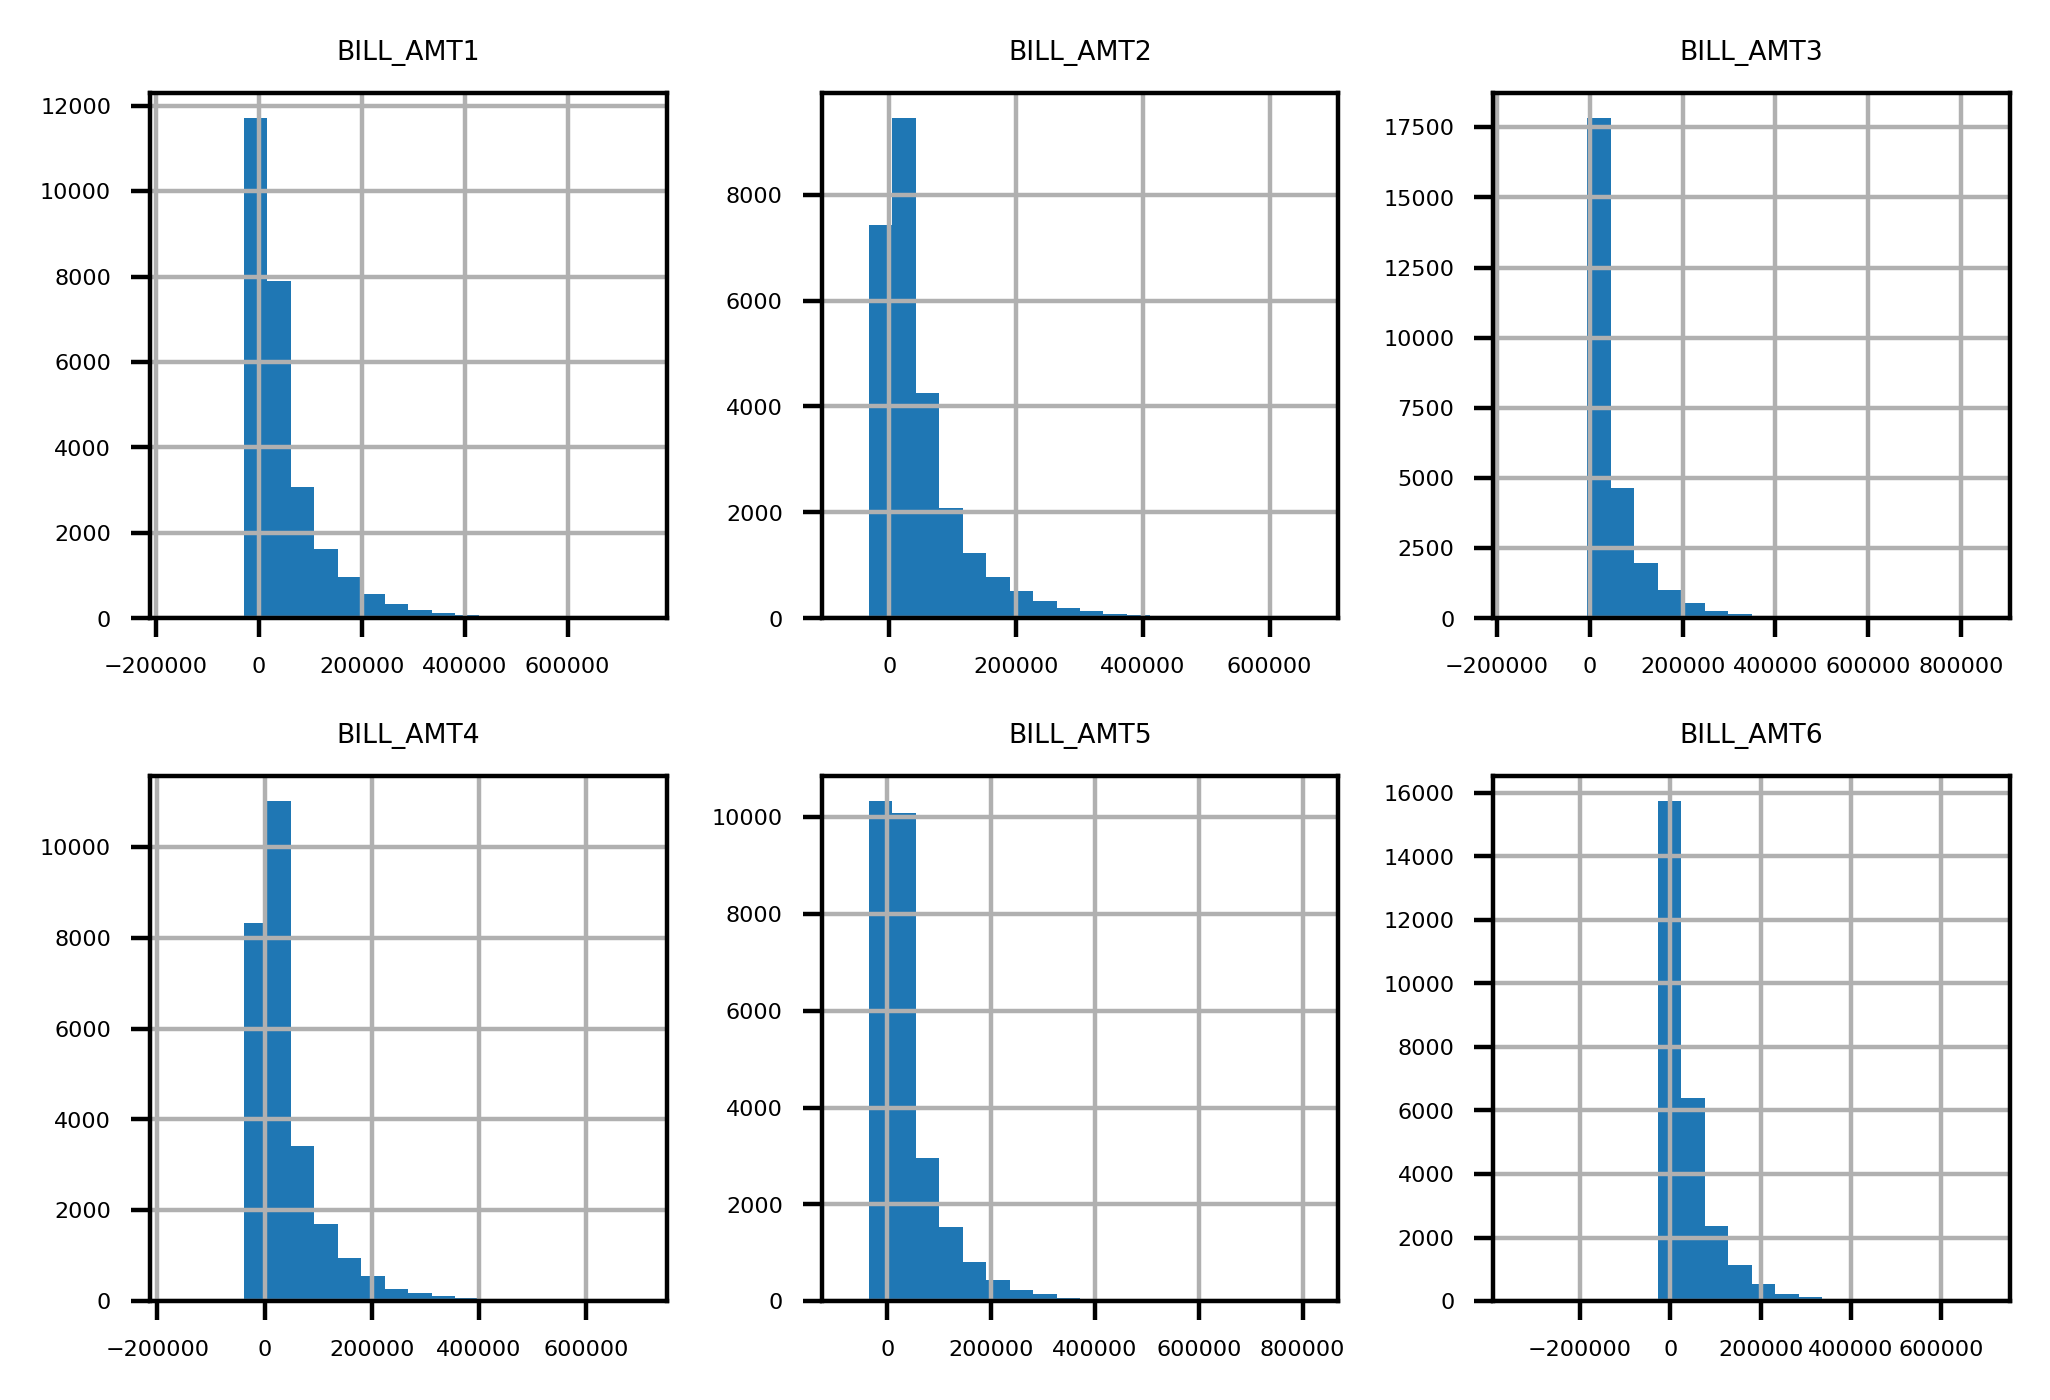

In [64]:
# Visualize the bill amount features 
df[bill_feats].hist(bins = 20, layout = (2,3))

The histogram plots make sense in several respects. Most accounts have relatively small bills. There is a steady decrease in the number of accounts
as the amount of the bill increases. It also appears that the distribution of billed amounts is roughly similar month to month, so we don't notice any data
inconsistency issues as we did with the payment status features. This feature appears to pass our data quality inspection. Now, we'll move on to the final set
of features.

In [65]:
# Examine statistical summaries of the payment amount features
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

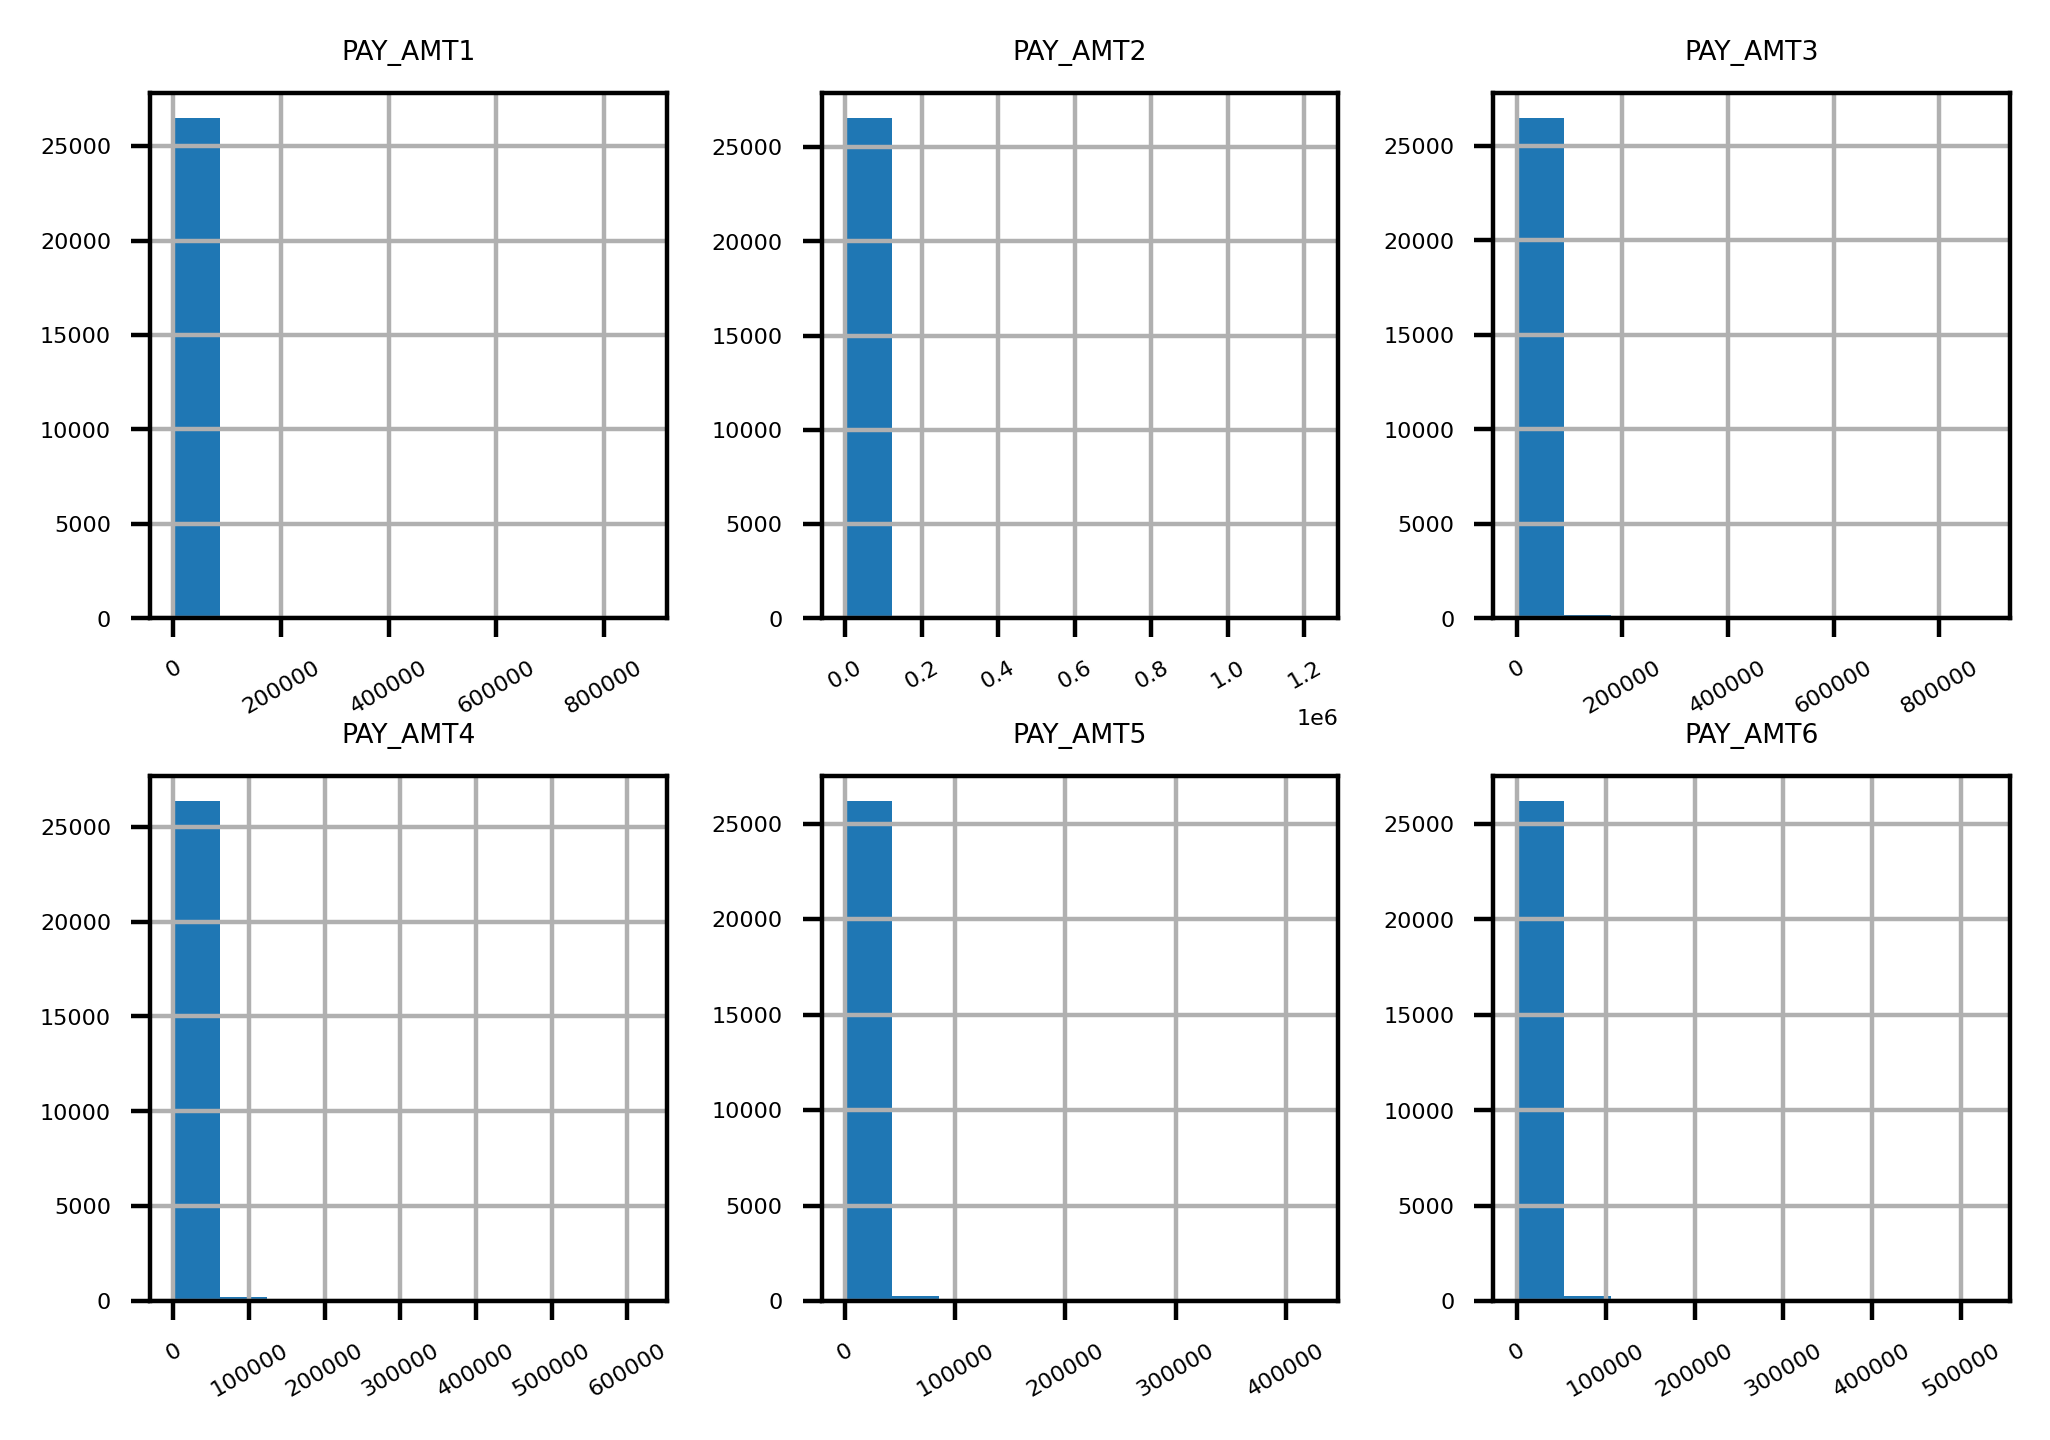

In [66]:
# Plotting the histogram of this features
df[pay_amt_feats].hist(layout=(2,3), xrot=30)

* This is not a very informative graphic, as there is only one bin in most of the histograms that is of a noticeable height.This
is not an effective way to visualize this data. It appears that the monthly payment amounts are mainly in a bin that includes 0.

In [67]:
# Getting the amount data that is exactly qual to 0
pay_zero_mask = df[pay_amt_feats] == 0
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

* As we can see that a substantial portion, roughly around 20-25% of accounts, have a bill payment qual to 0 in any given month. However, most bill payments are greater than 0. The reason we can not see them in the histogram is because the maximum bill payment in a month is typically 2 orders of magnitude(100 times) larger than the average bill payment. It seems likely there are only a small number of these very large bill payments. But because of the way the histogram is created, using qualisezed bins, nearly all the data is lumped into the smallest bin, and the largest bins are nearly invisiblle as they have so few accounts.

* To visualize this data better, we need to apply the base-10 logarithm

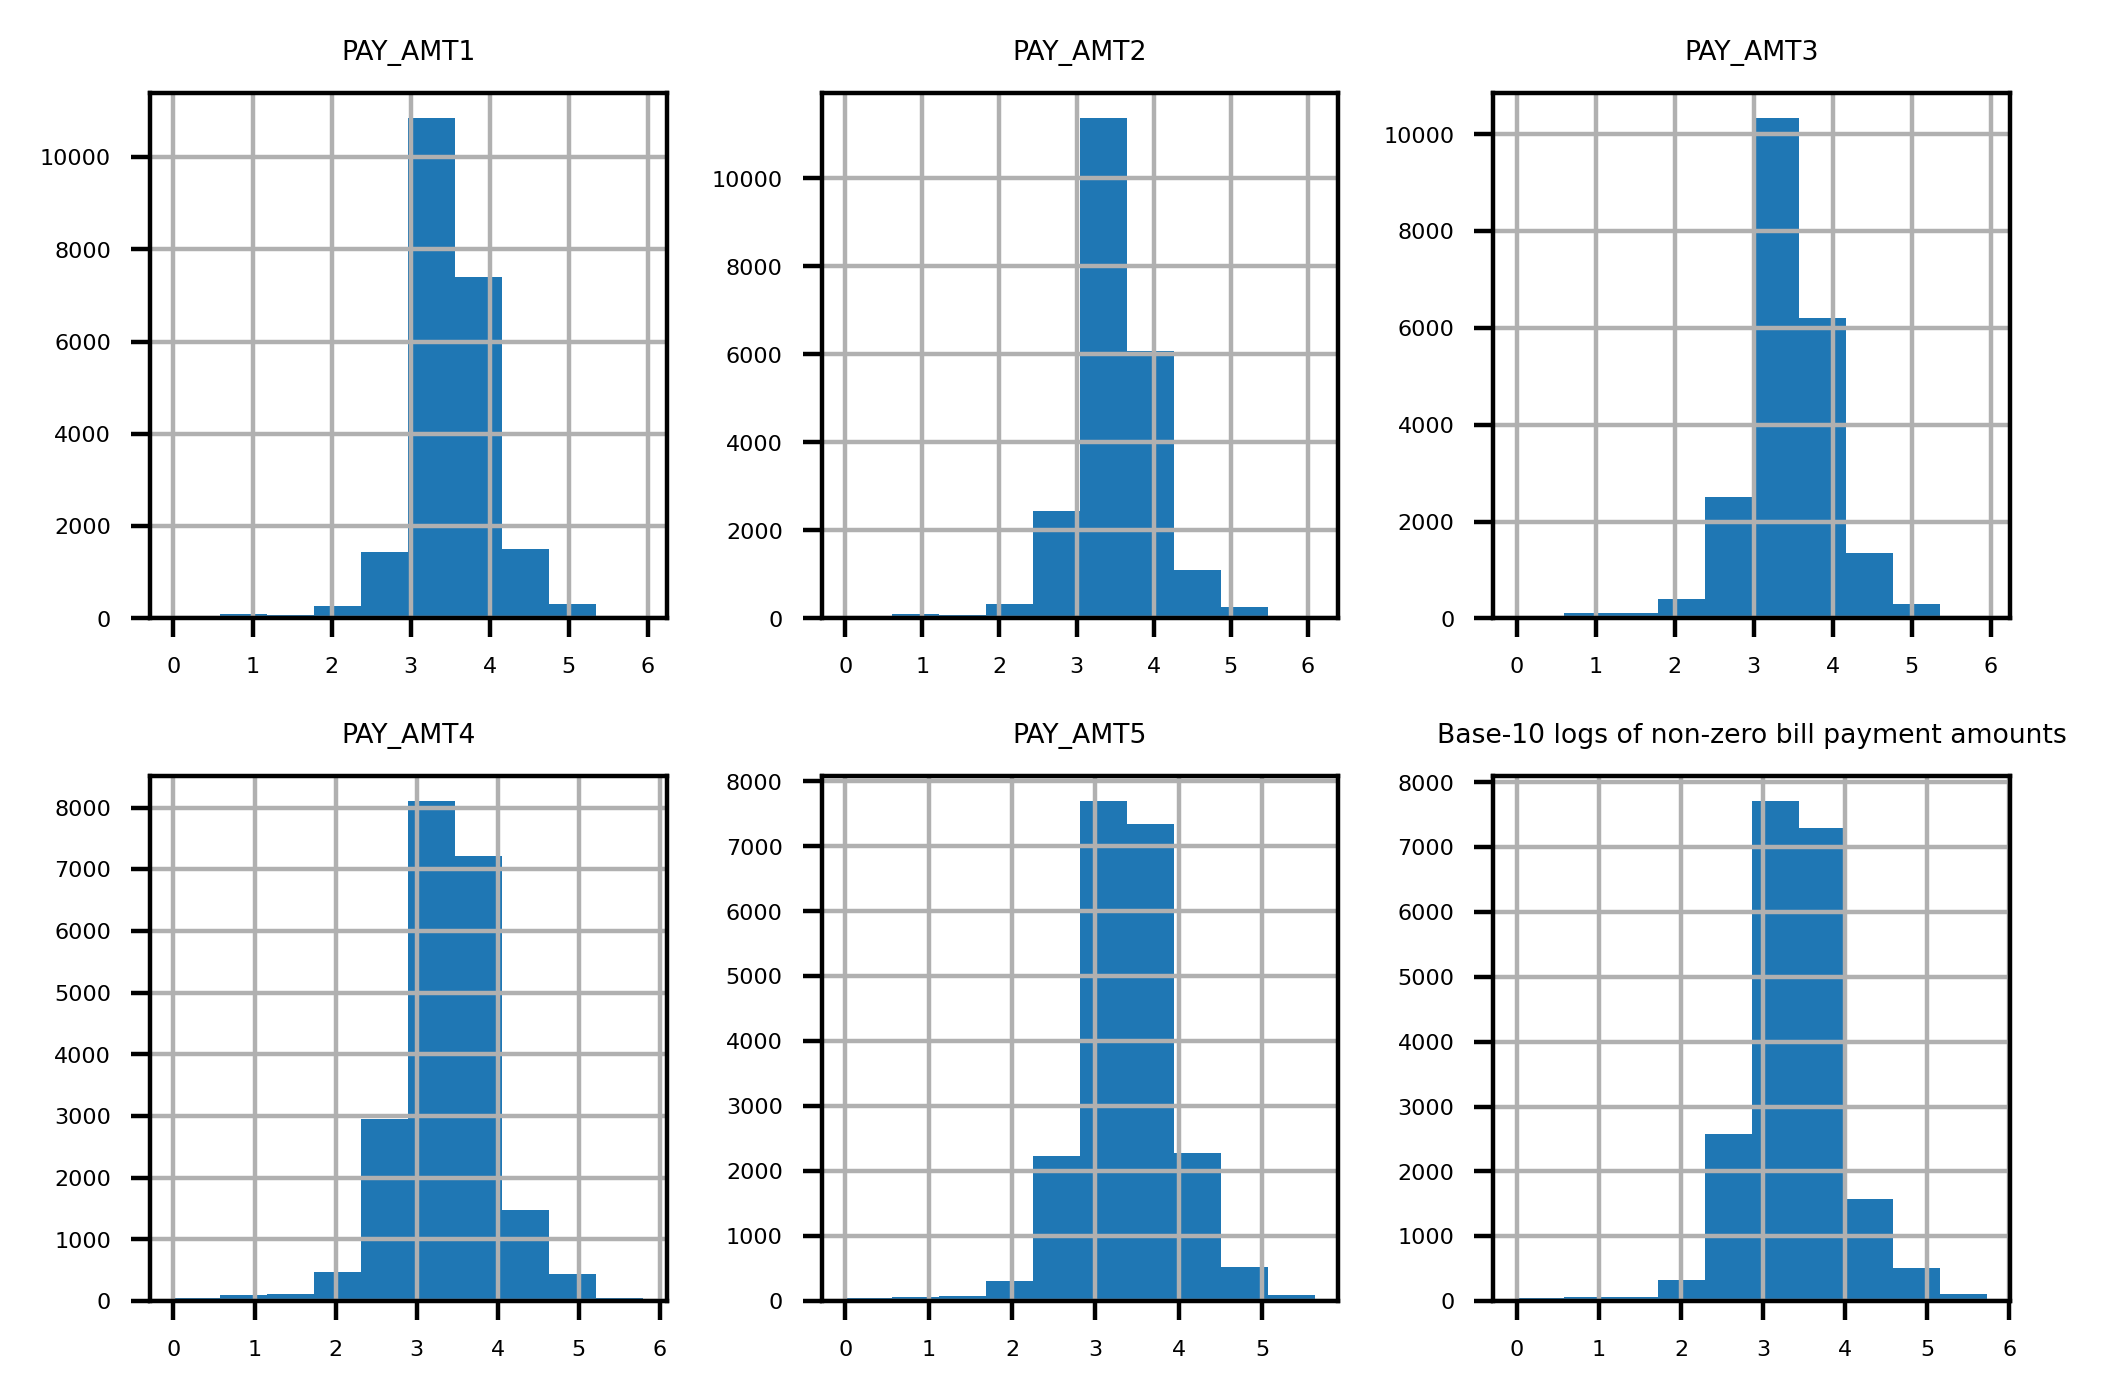

In [68]:
# Ignoring the payment of 0
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout = (2,3))
plt.title("Base-10 logs of non-zero bill payment amounts")
plt.show()

* We can see that:
     
     * The most commonly occuring payments are in the range of thouasnd(log10(1000) = 3), which matches what we observed from the mean of this payments, and also few pretty large ones. Overall, this distribution pf bill payments appears pretty consistent from month to month, so we do not see any potential issues with this data.

# 5. Logistic Regression and Feature Exploration

## 5.1. Examining the Relationships Between Features and the Response Variable

In [69]:
features_response = df.columns.tolist()

In [70]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [71]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

*  We are not going to use the **gender** variable due to ethical concerns, and we
learned that **PAY_2, PAY_3,…, PAY_6** are incorrect and should be ignored. Also, we
are not going to examine the one-hot encoding we created from the **EDUCATION**
variable, since the information from those columns is already included in the original
feature, at least in some form. We will just use the **EDUCATION** feature directly.
Finally, it makes no sense to use **ID** as a feature, since this is simply a unique account
identifier and has nothing to do with the response variable. Let's make another list of
column names that are neither features nor the response. We want to exclude these from our analysis:

In [72]:
removing_features = ["ID", "SEX", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "EDUCATION_CAT", 
                  "graduate school", "high school", "others", "university"]

In [73]:
features_response = [f for f in features_response if f  not in removing_features]

### a. Pearson Correlation

In [74]:
import seaborn as sns

In [75]:
corr = df[features_response].corr()

<AxesSubplot:>

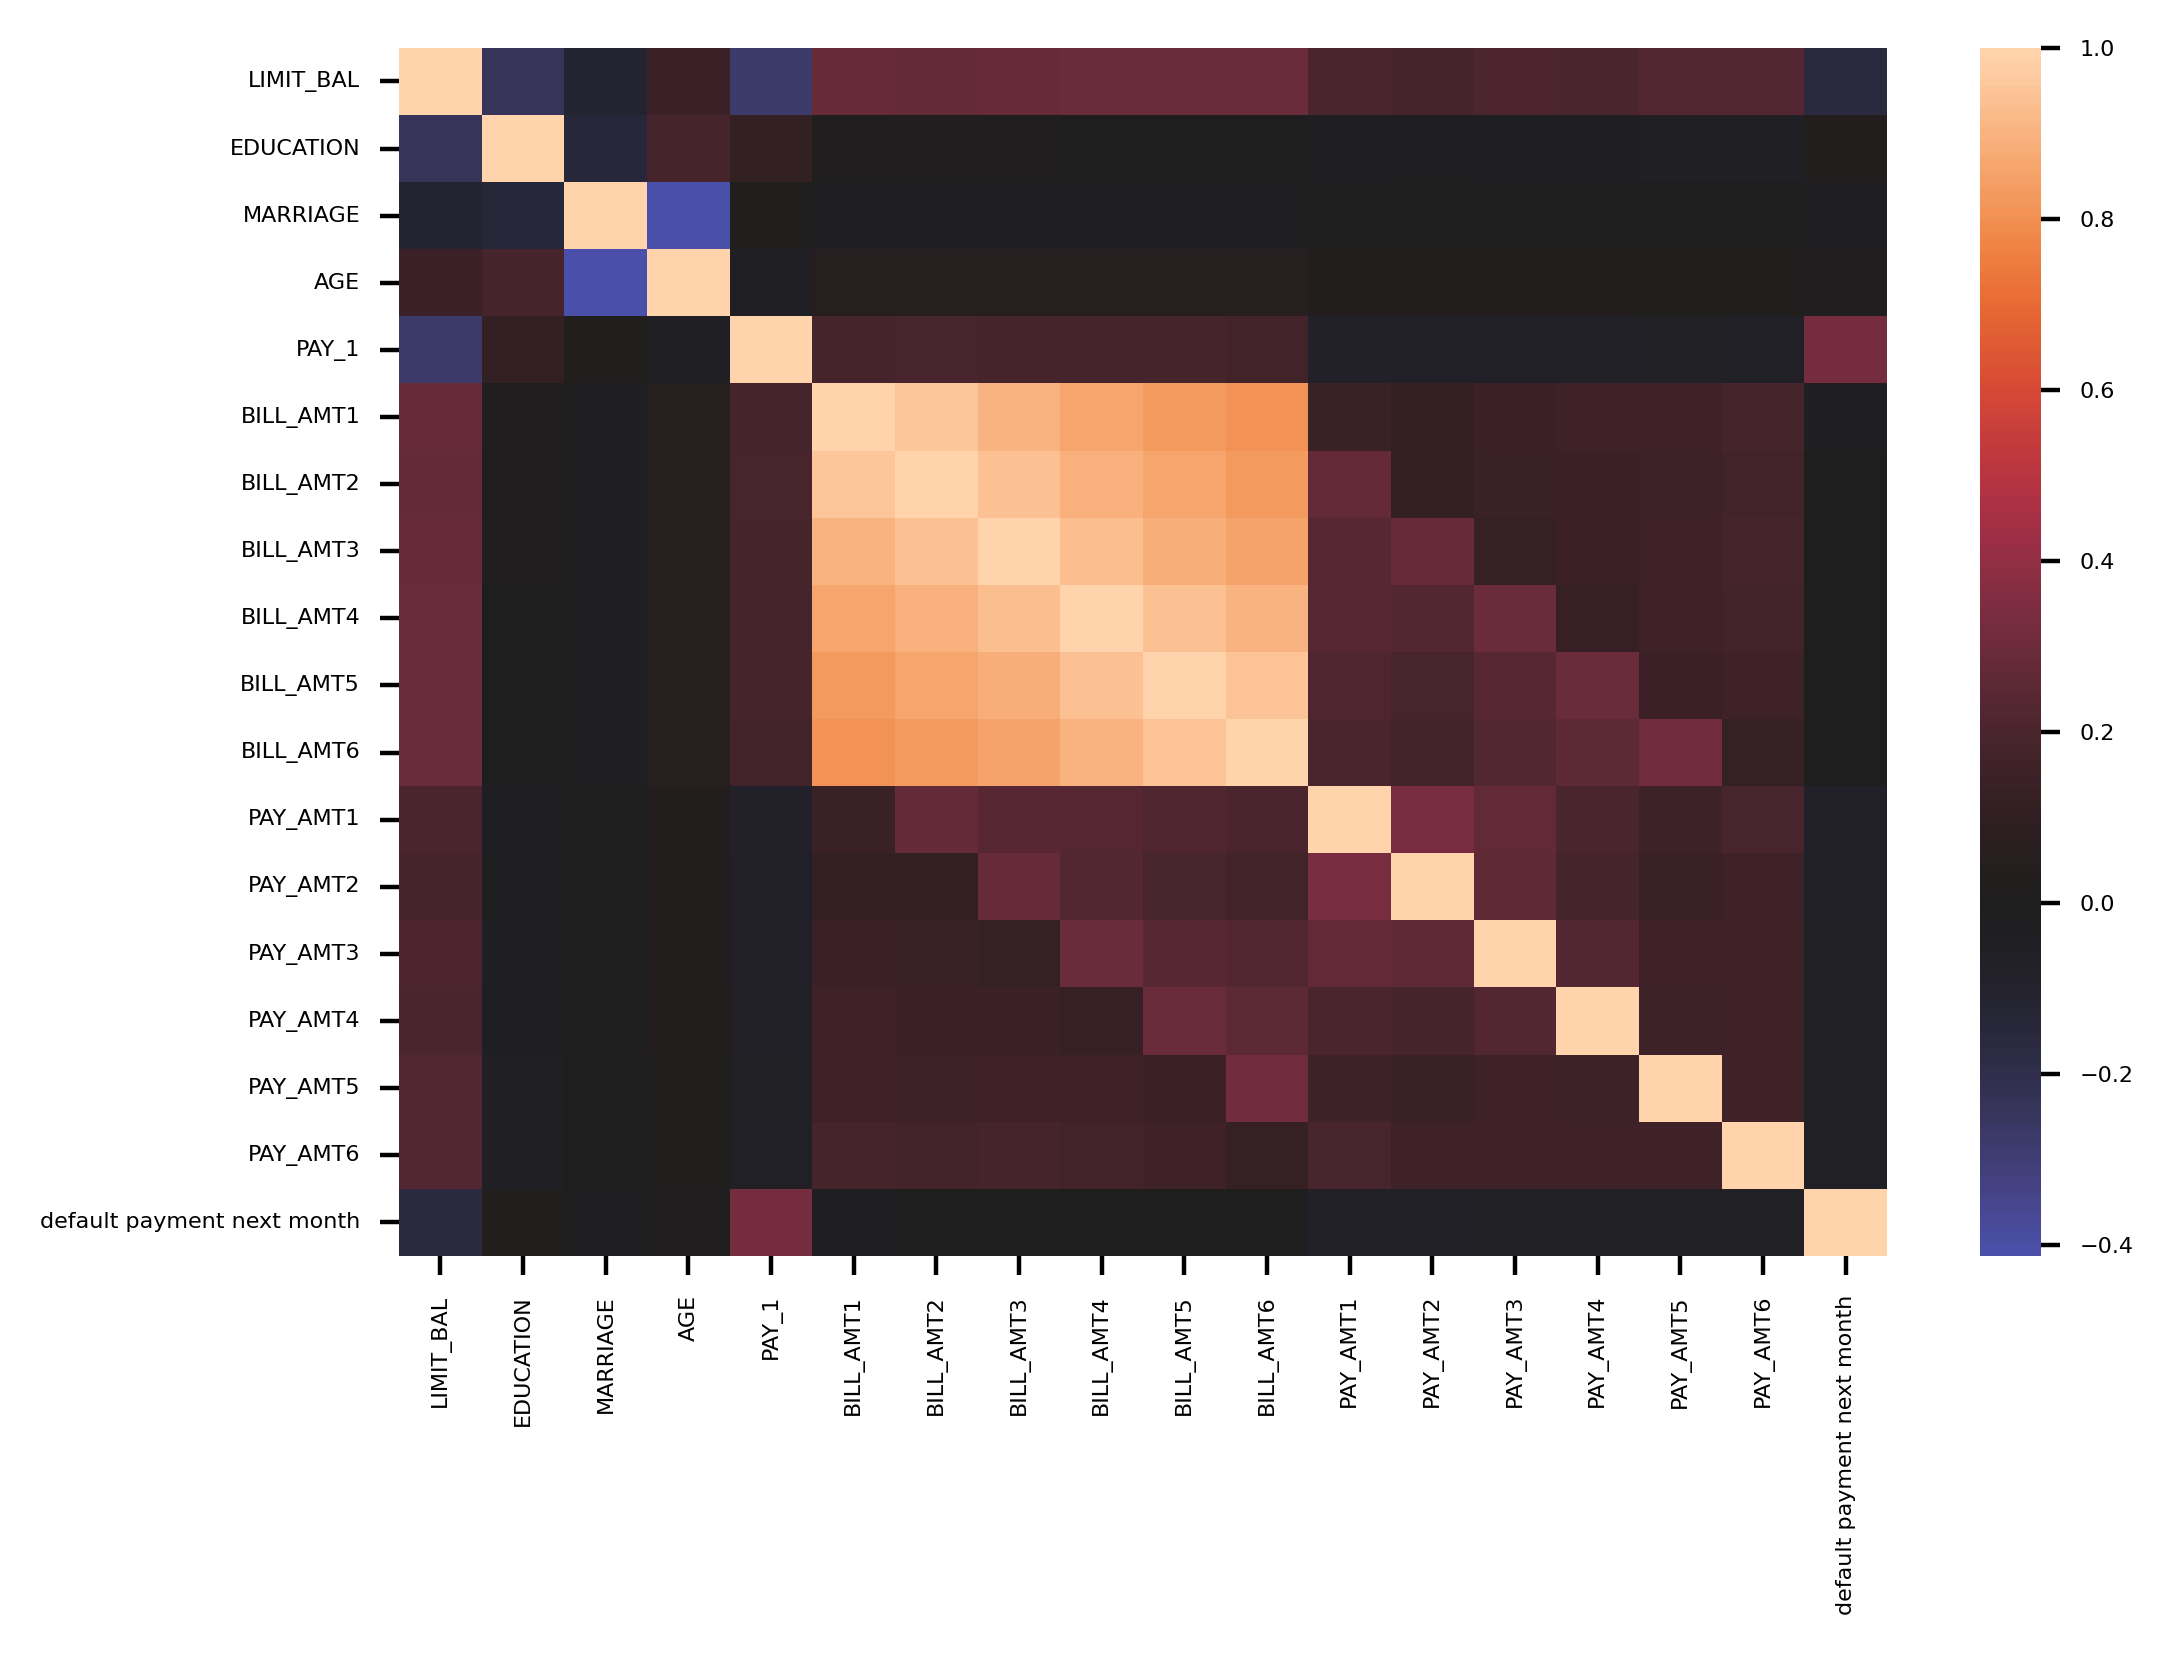

In [76]:
# Creating a heatmap correlation
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            center = 0)

So look at the last column in the correlation heatmap, we can conclude that: 

* PAY_1 and LIMIT_BAL have a strong colleration with the response variable. PAY_1 is likely to be one of the most predictive features for our model. While LIMIT_BAL is negatively correlated.

* The set of features BILL_ATM are correlated with each other.

In [77]:
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

### b. F_Test
* While Pearson correlation is theoretically valid for continuous response variables, the
binary response variable for the case study data could be considered categorical data,
with only two categories: 0 and 1. Among the different kinds of tests we can run, to
see whether features are associated with a categorical response, is the **ANOVA F-test**,
available in scikit-learn as **f_classif**. 

In [78]:
# Separating features and response as numpy array
X = df.loc[:,features_response[:-1]]
y = df.loc[:,features_response[-1]]

print(X.shape)
print(y.shape)

(26664, 17)
(26664,)


In [79]:
# Processing F-test
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X,y)

In [80]:
# Creating a DataFrame on feature names, F-statistics, and p-values and show it sorted on p-value
f_statistic_df = pd.DataFrame({"Feature": features_response[:-1],
                               "F statistic": f_stat,
                               "P value": f_p_value})

In [81]:
f_statistic_df.sort_values("P value")

,Feature,F statistic,P value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


From the F statistic, we can see that:

* PAY_1 and LIMIT_BAL have the smallest p values so they should be the most useful features

* Getting the top 20% of features

In [82]:
# Getting the top 20% of features according to the F-test
from sklearn.feature_selection import SelectPercentile

In [83]:
selector = SelectPercentile(f_classif, percentile = 20)
selector

SelectPercentile(percentile=20)

In [84]:
# Fititng the data to selector
selector.fit(X,y)

SelectPercentile(percentile=20)

In [85]:
best_features_idx = selector.get_support()
best_features_idx

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [86]:
# Getting the best features
best_features = [features_response[i] for i in range(len(features_response[:-1])) if best_features_idx[i]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

## 5.1. Fitting a Logistic Regression Model and Directly Using the Coefficients

* In this activity, we're going to train a logistic regression model on the two most
important features we discovered in univariate feature exploration, as well as
learning how to manually implement logistic regression using coefficients from the
fitted model. 

### a. Training data

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
# Splitting dataset into traning and test set
X_train, X_test, y_train, y_test = train_test_split(df[["PAY_1", "LIMIT_BAL"]].values.reshape(-1,2),
                                                    df["default payment next month"].values,
                                                    test_size = 0.2,
                                                    random_state= 24)

In [89]:
print(X_train.shape, y_train.shape)

(21331, 2) (21331,)


In [90]:
from sklearn.linear_model import LogisticRegression

my_lg = LogisticRegression(solver = "liblinear")

In [91]:
# Fitting the training data to our model
my_lg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [92]:
y_pred = my_lg.predict(X_test)

In [93]:
is_true = y_pred == y_test

# Showing the accuracy of model
is_true.mean()

0.7834239639977498

In [94]:
# Getting the predicted probability on the test set
y_pred_proba = my_lg.predict_proba(X_test)
y_pred_proba[:10]

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       [0.79604453, 0.20395547],
       [0.584297  , 0.415703  ],
       [0.92064596, 0.07935404],
       [0.92064596, 0.07935404],
       [0.66393435, 0.33606565],
       [0.73522868, 0.26477132],
       [0.76087641, 0.23912359]])

### b. ROC curve

In [95]:
import sklearn.metrics as metrics

In [96]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,1])

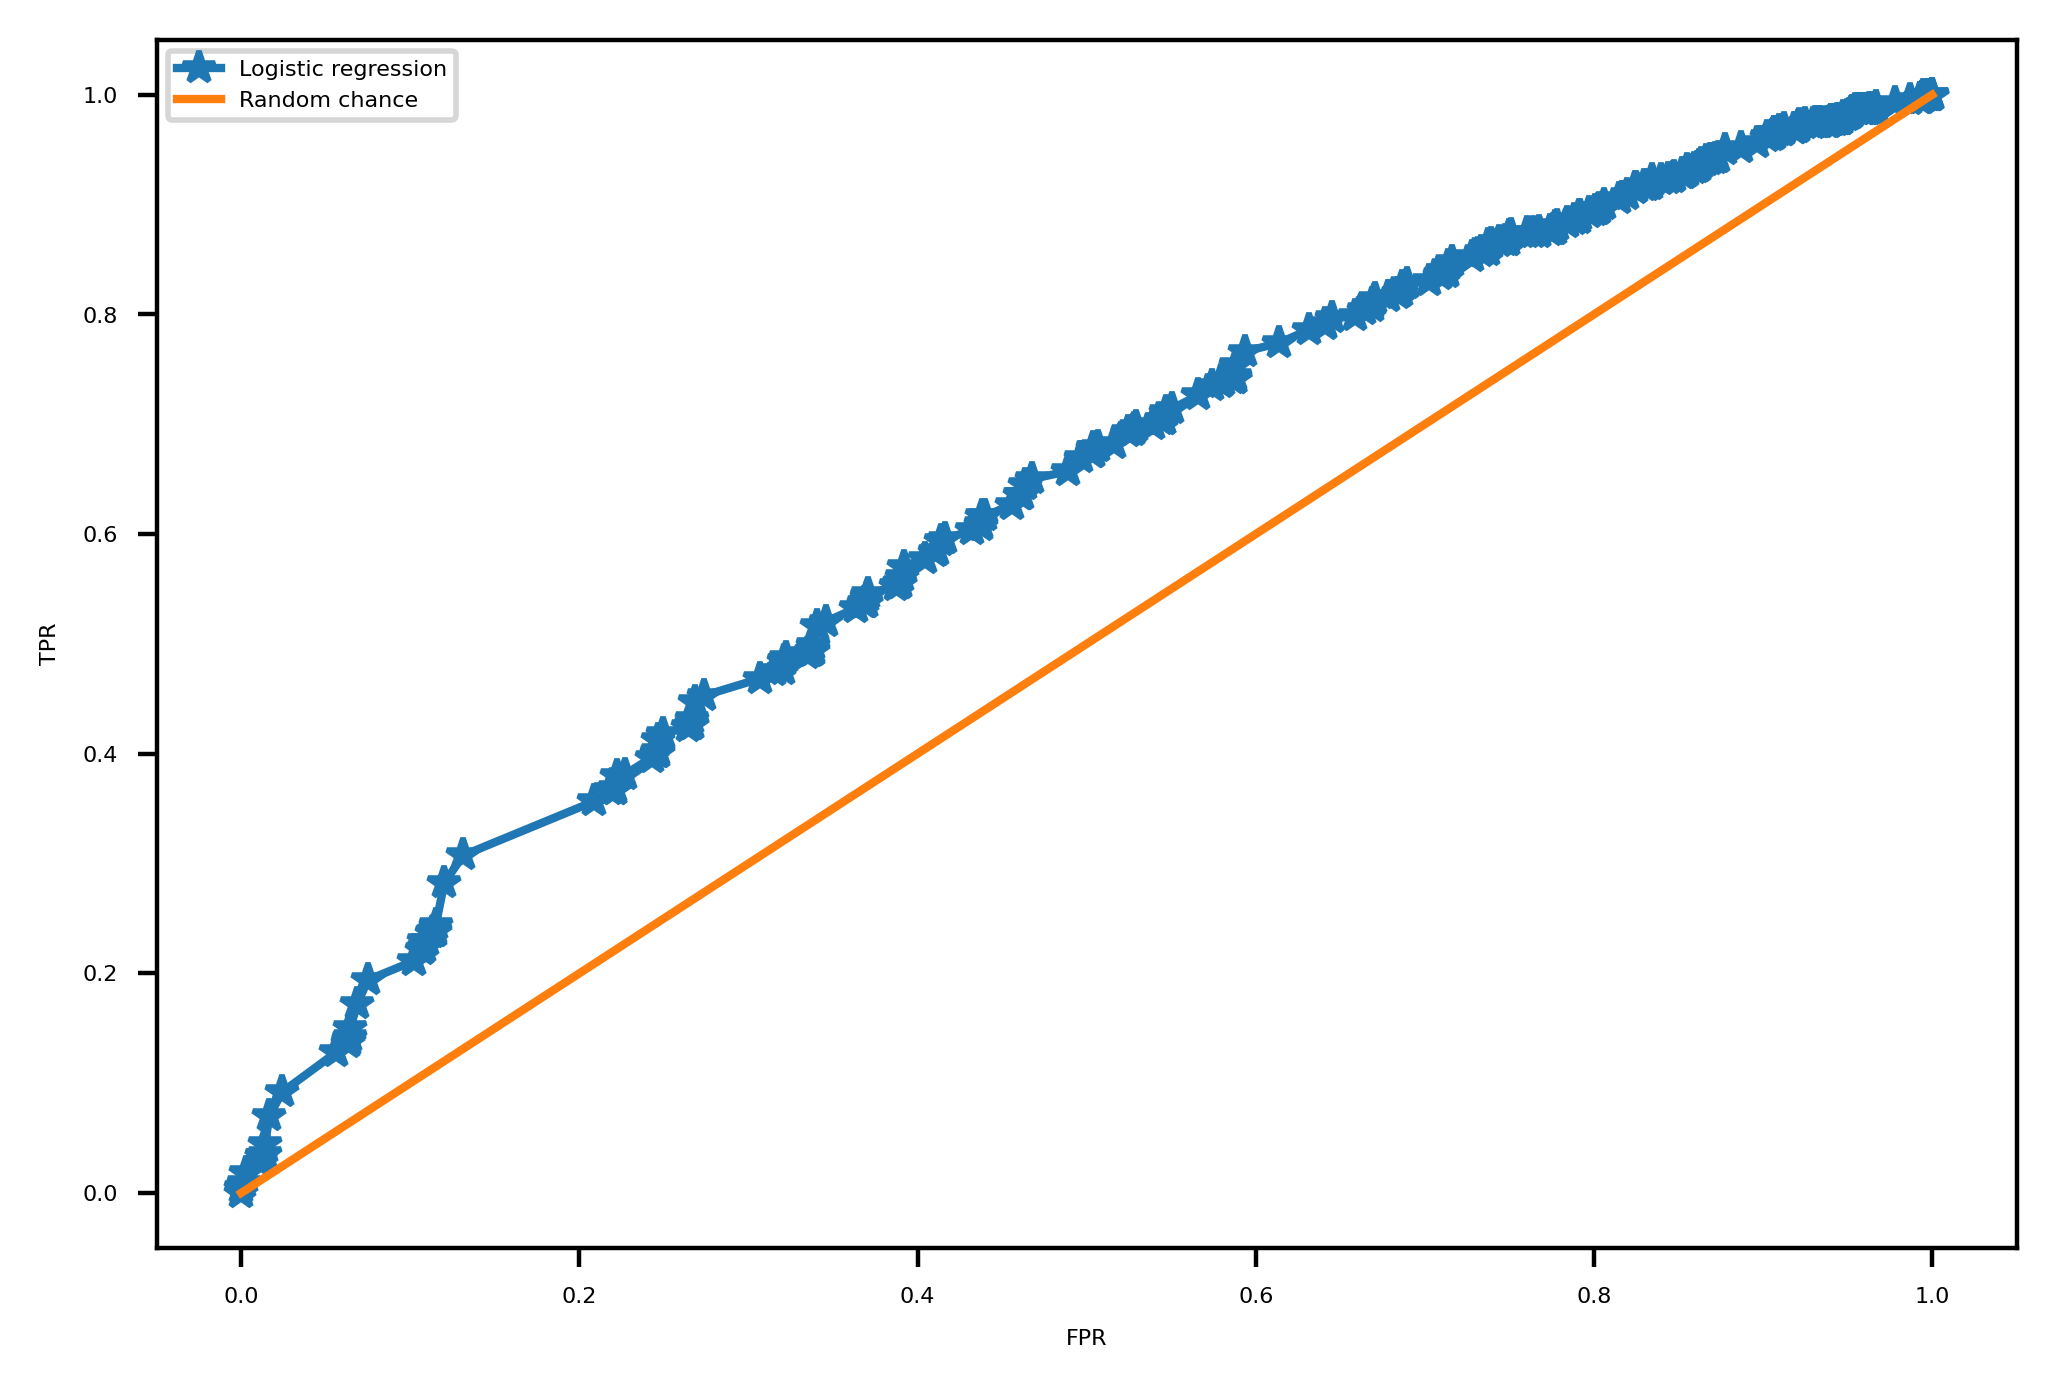

In [97]:
plt.plot(fpr, tpr, "*-")
plt.plot([0,1], [0,1])

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(["Logistic regression", "Random chance"])
plt.show()

In [98]:
# Calculating the auc
metrics.roc_auc_score(y_test, y_pred_proba[:,1])

0.627207450280691

#

## 5.2. Scaling Data, Pipelines, and Interaction Features

### a. Training data with all the features

In [99]:
# Setting K-folds
from sklearn.model_selection import StratifiedKFold
n_folds = 4
k_folds = StratifiedKFold(n_splits= n_folds, shuffle = True, random_state = 1)

In [100]:
X = df[features_response[:-1]].values
y = df[features_response[-1]].values

In [101]:
print(X.shape)
print(y.shape)

(26664, 17)
(26664,)


In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [103]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21331, 17)
(21331,)
(5333, 17)
(5333,)


In [104]:
# instantiate the MinMaxScaler scaler
from sklearn.preprocessing import MinMaxScaler
min_max_sc = MinMaxScaler()

In [105]:
# Import the logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = "saga", penalty = "l1", max_iter = 1000) # using saga solver because we want to use L1 regularization


In [106]:
# Import Pipeleines class and create a pipeline object
from sklearn.pipeline import Pipeline
scale_lr_pipeline = Pipeline(steps = [("scaler", min_max_sc), ("model", lr)])

In [107]:
scale_lr_pipeline.set_params(model__C = 2)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=2, max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [108]:
# Create a small range of C values to test with cross-validation
C_val_exponents = np.linspace(2,-3,6)

In [109]:
C_vals = np.float(10)** C_val_exponents
C_vals

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])

In [110]:
# Creating a function named cross_val_C_search_pipe
def cross_val_C_search_pipe(k_folds, C_vals, pipeline, X,y):
    # Getting the number of folds
    n_folds = k_folds.n_splits
    
    # Creating an empty numpy array to store roc_auc_scores for training and testing data
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    
    # Creating a list of list to store the roc_curve of testing data
    cv_test_roc = [[]] * len(C_vals)
    
    for c_vals_counter in range(len(C_vals)):
        # Setting the C value to our pipeline
        pipeline.set_params(model__C = C_vals[c_vals_counter])
        
        # Counter for the fold
        fold_counter = 0
        
        for train_index, test_index in k_folds.split(X,y):
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = y[train_index], y[test_index]
            
            # Fitting the training data to our pipeline
            pipeline.fit(X_cv_train, y_cv_train)
            
            # Getting the roc_auc_score for training data
            y_cv_train_pred_proba = pipeline.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_vals_counter] = metrics.roc_auc_score(y_cv_train, y_cv_train_pred_proba[:,1])
            
            # Getting the roc_auc_score for training data
            y_cv_test_pred_proba = pipeline.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_vals_counter] = metrics.roc_auc_score(y_cv_test, y_cv_test_pred_proba[:,1])
            
            # Obtain the test ROC curves for each fold
            this_fold_roc = metrics.roc_curve(y_cv_test, y_cv_test_pred_proba[:,1])
            cv_test_roc[c_vals_counter].append(this_fold_roc)
            
            fold_counter += 1
        
        print('Done with C = {}'.format(pipeline.get_params()['model__C']))
    
    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc
            
    
    
    

In [111]:
# Getting the output
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline, X_train, y_train)

Done with C = 100.0
Done with C = 10.0
Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001


Text(0.5, 1.0, 'Cross-validation on Case Study problem')

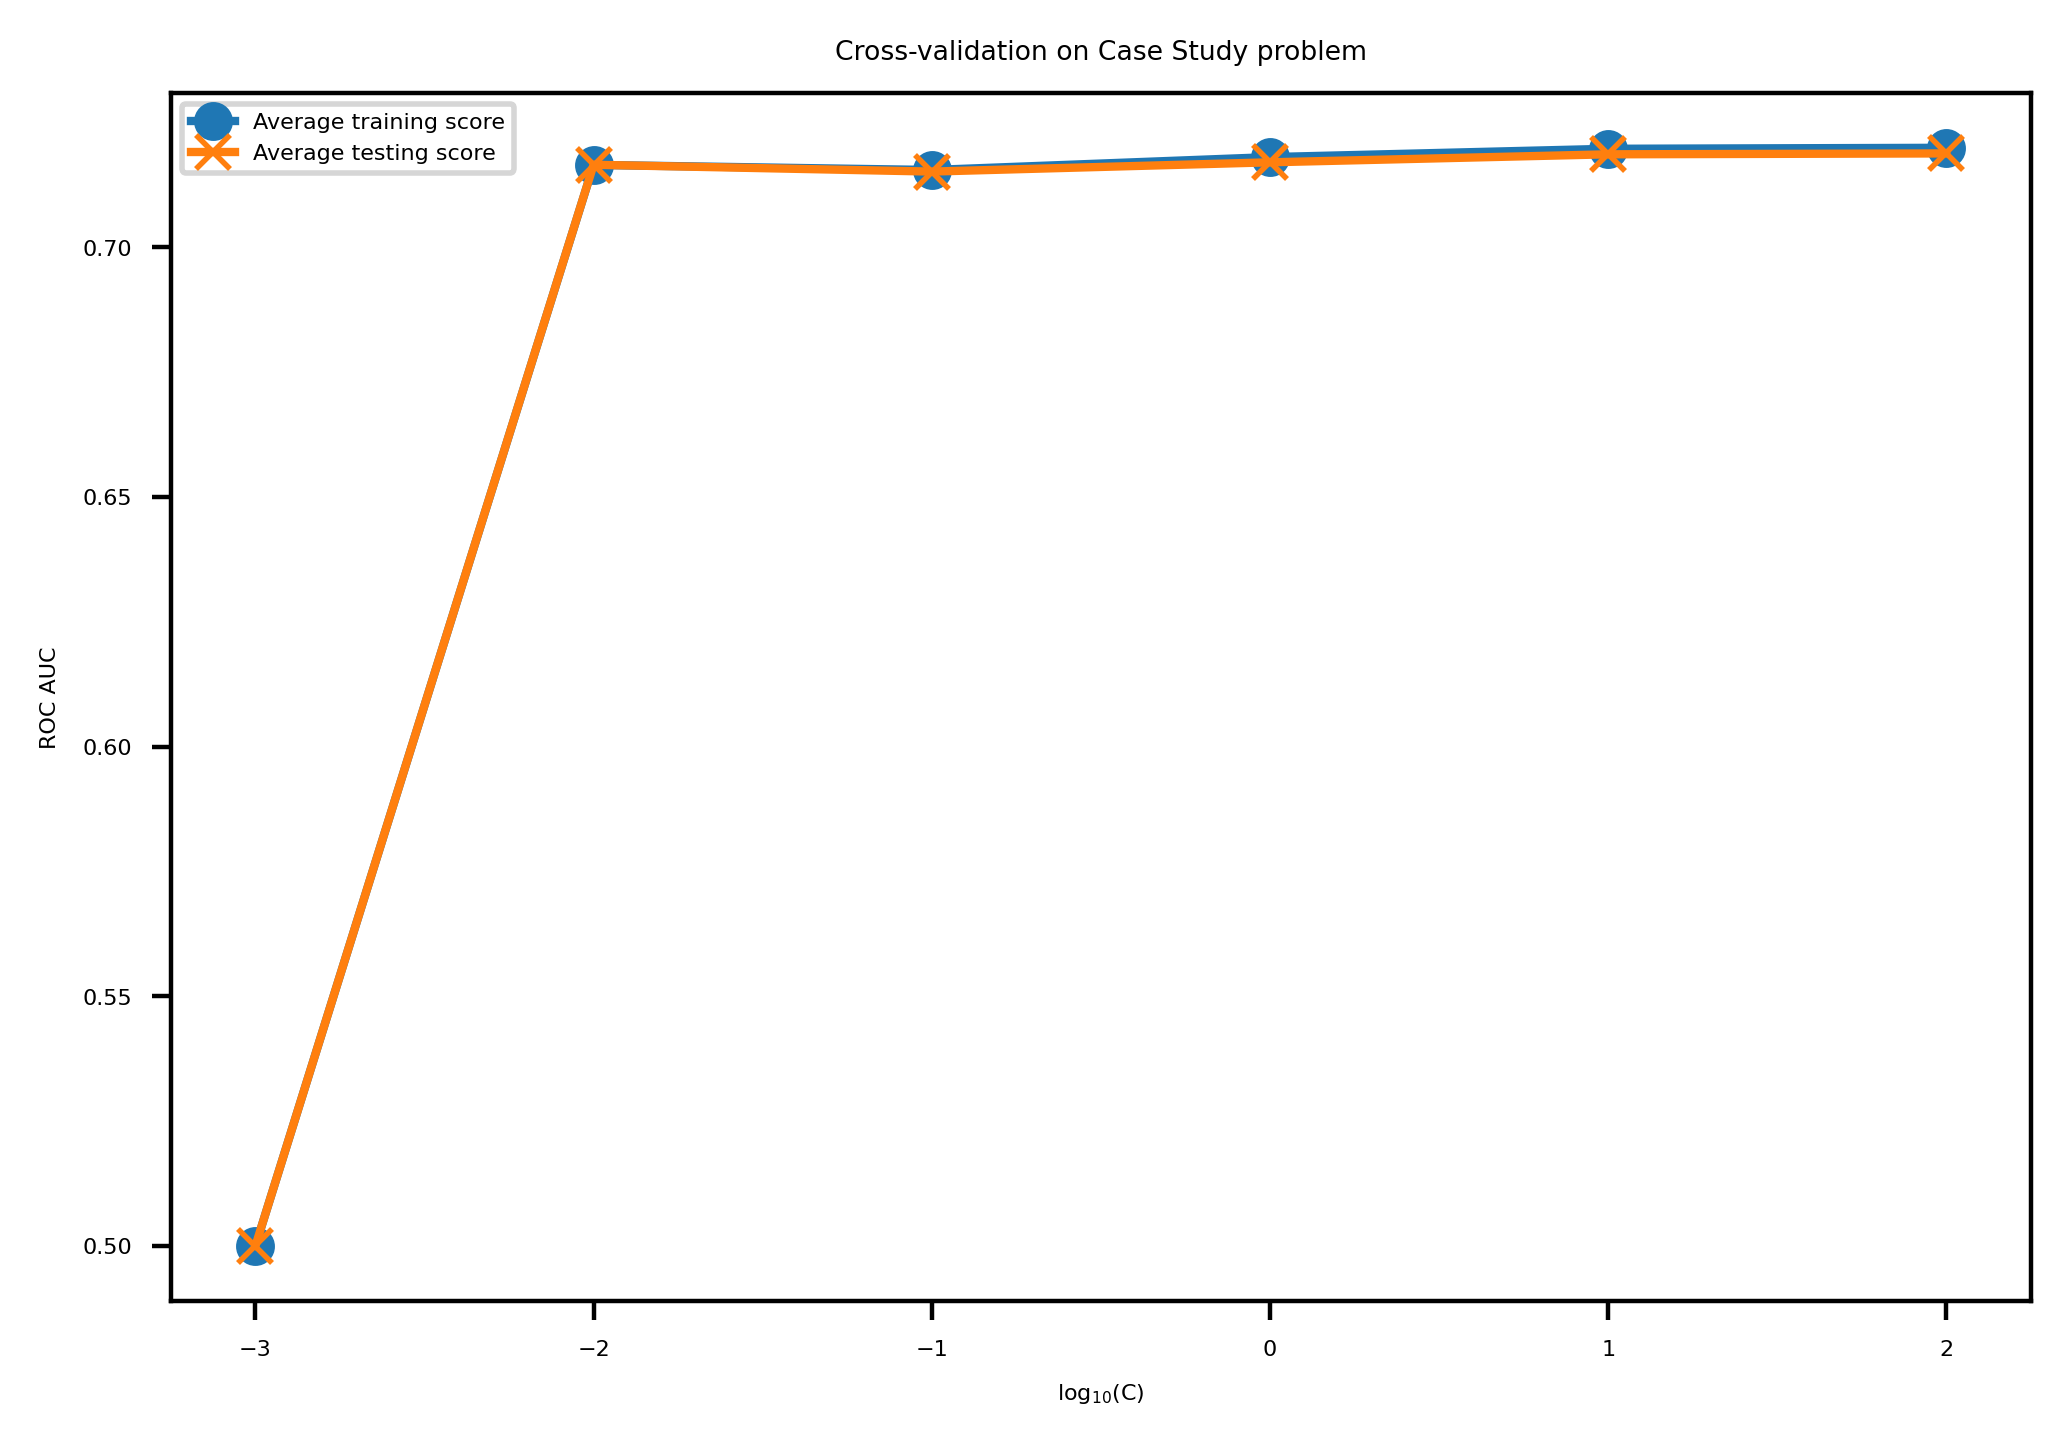

In [112]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis = 0),
         "-o", label = "Average training score")

plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis = 0),
         "-x", label = "Average testing score")

plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross-validation on Case Study problem')

* what we can observe from this plot is:
    * Regularization does not have much impact for lower C values, which correspond to stronger regularization, model testing (as well as training) performaces decreases.
    
    * While we are able to use all 17 features, it appears there is no overfitting going on ---> Instead of that, it is possible that we may be underfitting ---> Let's try engineering some interaction features to see if they can improve the performance

In [113]:
from sklearn.preprocessing import PolynomialFeatures

# Making interactions
make_interactions = PolynomialFeatures(degree = 2,
                                       interaction_only = True,
                                       include_bias = False)

X_interact = make_interactions.fit_transform(X)

# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_interact, df["default payment next month"].values,
                                                    test_size  =0.2, random_state = 24)

In [114]:
print(X_train.shape)
print(X_test.shape)

(21331, 153)
(5333, 153)


* The number of features now is equal to 153, this is because 17 + 17 choose 2 = 153 (choosing all possible combiantions of 2 features to interact from the 17 original features)

In [115]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline, 
                                                                         X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Done with C = 100.0


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Done with C = 10.0


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001


Text(0.5, 1.0, 'Cross-validation on Case Study problem')

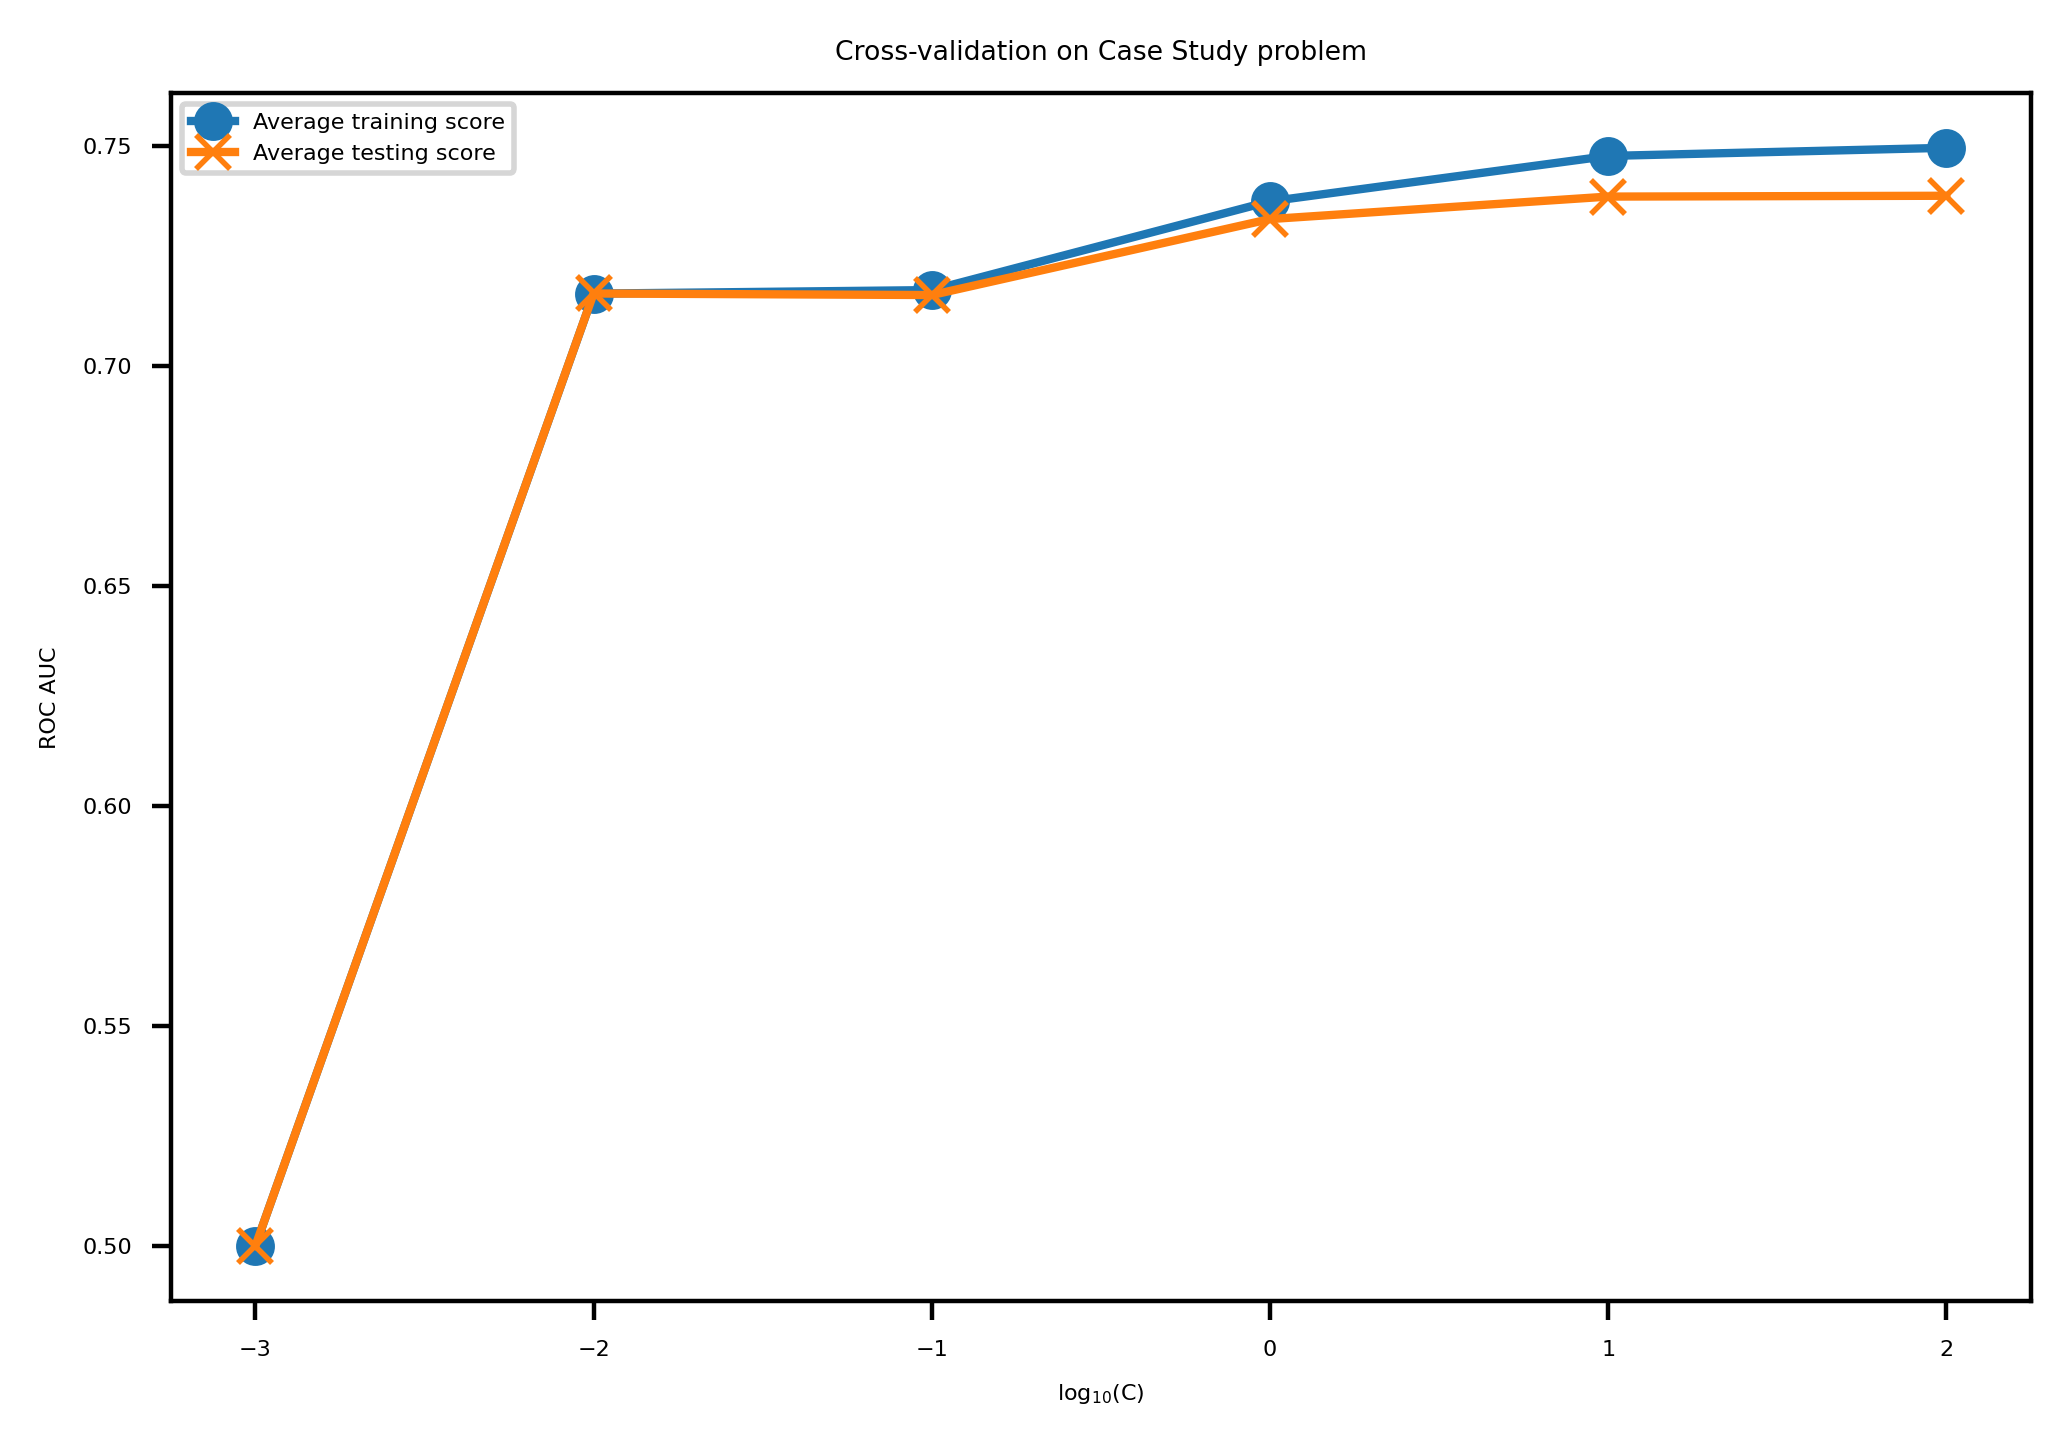

In [116]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis = 0),
         "-o", label = "Average training score")

plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis = 0),
         "-x", label = "Average testing score")

plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross-validation on Case Study problem')

In [117]:
# Getting the roc_auc_score at C = 100
np.mean(cv_test_roc_auc, axis = 0)[0]

0.7386916214748362

* What we can see here is:
    * Engineering the interaction features increases the best model test score to about ROC AUC = 0.74 on average across the folds, from about 0.72 without including interactions. These scores happen at C = 100, that is, with negligible regularization. 
    
    * On the plot of training versus test scores for the model with interactions, we can see that the training score is a bit higher than the test score, so it could be said that some amount of overfitting is going on. However, we cannot increase the test score through regularization here, so this may not be a problematic instance of overfitting. In most cases, whatever strategy yields the highest score is the best strategy.
    
    * In summary, adding interaction features improved cross-validation performance and regularization appears not to be useful for the data at this point, using a logistic regression model.

# 6. Decision Trees and Random Forests

In [118]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [119]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(df[features_response[:-1]].values,
                                                    df['default payment next month'].values,
                                                    test_size = 0.2, random_state = 24)

In [120]:
# instantiate the decision tree
dt = tree.DecisionTreeClassifier(max_depth = 2)

# We just want to grow the tree to a depth of at most 2

In [121]:
# Fitting the tree
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [122]:
# Export the trained model in a format that can be read by the graphviz package using this code:
dot_data = tree.export_graphviz(dt,
                               out_file = None,
                               filled = True,
                               rounded = True,
                               feature_names = features_response[:-1],
                               proportion= True,
                               class_names= ["Not defaulted", "Defaulted"])

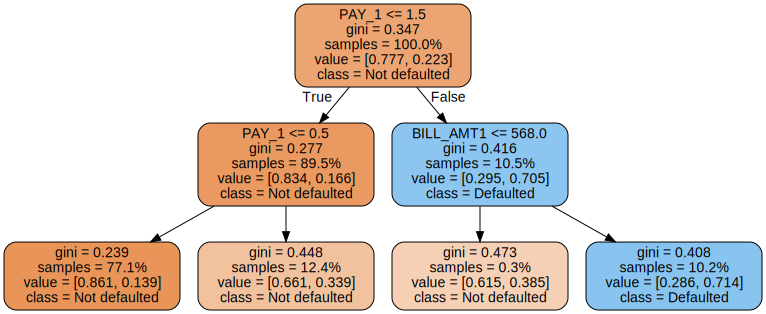

In [123]:
# Create an image from dot_data
import graphviz
graph = graphviz.Source(dot_data)
graph

* Notice that **PAY_1** was the feature chosen for the first split. This means that it was the best feature in terms
of decreasing node impurity on the node containing all of the training samples. Recall our experience with **5. Logistic Regression and Feature Exploration**, where **PAY_1** was the top-selected feature from the F-test. So, the appearance of this feature in the first split of the decision tree makes sense given our previous analysis.

* In the second level of the tree, there is another split on **PAY_1**, as well as a split on **BILL_AMT_1**. **BILL_AMT_1** was not listed among the top features in univariate feature selection. However, it may be that there is an important interaction between **BILL_AMT_1** and **PAY_1**, which would not be found up by univariate methods. In particular, from the splits chosen by the decision tree, it seems that those accounts with both a value of 2 or greater for **PAY_1**, and a **BILL_AMT_1** of greater than 568, are especially at risk of default.

### a. Finding optimal hyperparameter for a decision tree

* Using **GridSearchCV** to tune the hyperparameters for a decision tree model

In [124]:
# Import the GridSearchCV class
from sklearn.model_selection import GridSearchCV

* The next step is to define the hyperparameters that we want to search using
cross-validation. We will find the best maximum depth of tree, using the **max_depth** 
parameter. Deeper trees have more node splits, which partition the training set into smaller
and smaller subspaces using the features. While we don't know the best maximum depth ahead of time, it is helpful to consider
some limiting cases when considering the range of parameters to use for the grid search.

In [125]:
# Finding the number of samples in our training data
X_train.shape

(21331, 17)

* With 21,331 training samples and 4-fold cross-validation, there will be threefourths of the samples, or about 16,000 samples, in each training fold


* As we already know, a tree with L leaf nodes has a depth of approximately log2(L) ---> meaning that in the limiting case, if we grow the tree deep enough so that every leaf node has one training sample for a given fold, the depth will be lg2(16000) = 14. So 14 is the theoretical limit to the depth of a tree that we could grow in this case.


* Obviously, we do not want to grow a tree this deep, as the model will be likely overfit ---> we will explore a range of depths from 1 up to 12

In [126]:
# Define a dictionary with the key being the hyperparameter name and the
#value being the list of values of this hyperparameter that we want to search in cross-validation:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}

In [127]:
# Instantiate the GridSearchCV class 
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, refit=True, cv=4, verbose=1,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [128]:
# Perform 4-fold cross-validation to search for the optimal maximum depth
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

* Now it's time to examine the results of the cross-validation procedure. Among the methods that are available on the fitted **GridSearchCV** object is **.cv_results_.** This is a dictionary containing the names of results as keys and the results themselves as values.

In [129]:
# create and examine a pandas DataFrame of crossvalidation results:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.026456,0.000275,0.002489,0.000130,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.049472,0.000560,0.002394,0.000029,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.093133,0.000947,0.002586,0.000035,4,{'max_depth': 4},0.732720,0.741078,0.746946,0.743731,0.741119,0.005276,2,0.756882,0.752421,0.749368,0.753055,0.752932,0.002673
3,0.136928,0.001413,0.002864,0.000125,6,{'max_depth': 6},0.745011,0.746910,0.751881,0.741491,0.746323,0.003752,1,0.782202,0.780044,0.775228,0.774776,0.778062,0.003158
4,0.174900,0.001316,0.002933,0.000127,8,{'max_depth': 8},0.728959,0.732295,0.748121,0.728438,0.734453,0.008029,3,0.812035,0.808187,0.803345,0.802368,0.806484,0.003889
5,0.209064,0.000912,0.002979,0.000080,10,{'max_depth': 10},0.706294,0.702673,0.720637,0.712562,0.710542,0.006818,4,0.848973,0.854154,0.841360,0.836530,0.845254,0.006788
6,0.241391,0.001207,0.003155,0.000238,12,{'max_depth': 12},0.677020,0.661722,0.677173,0.677415,0.673332,0.006705,6,0.888177,0.903297,0.885408,0.875842,0.888181,0.009855


* Let's make a plot showing how the average testing score varies with the max_depth hyperparameter. We will also show the average training scores on the same plot,
to see how bias and variance change as we allow deeper and more complex trees to be grown during model fitting

Text(0, 0.5, 'ROC AUC')

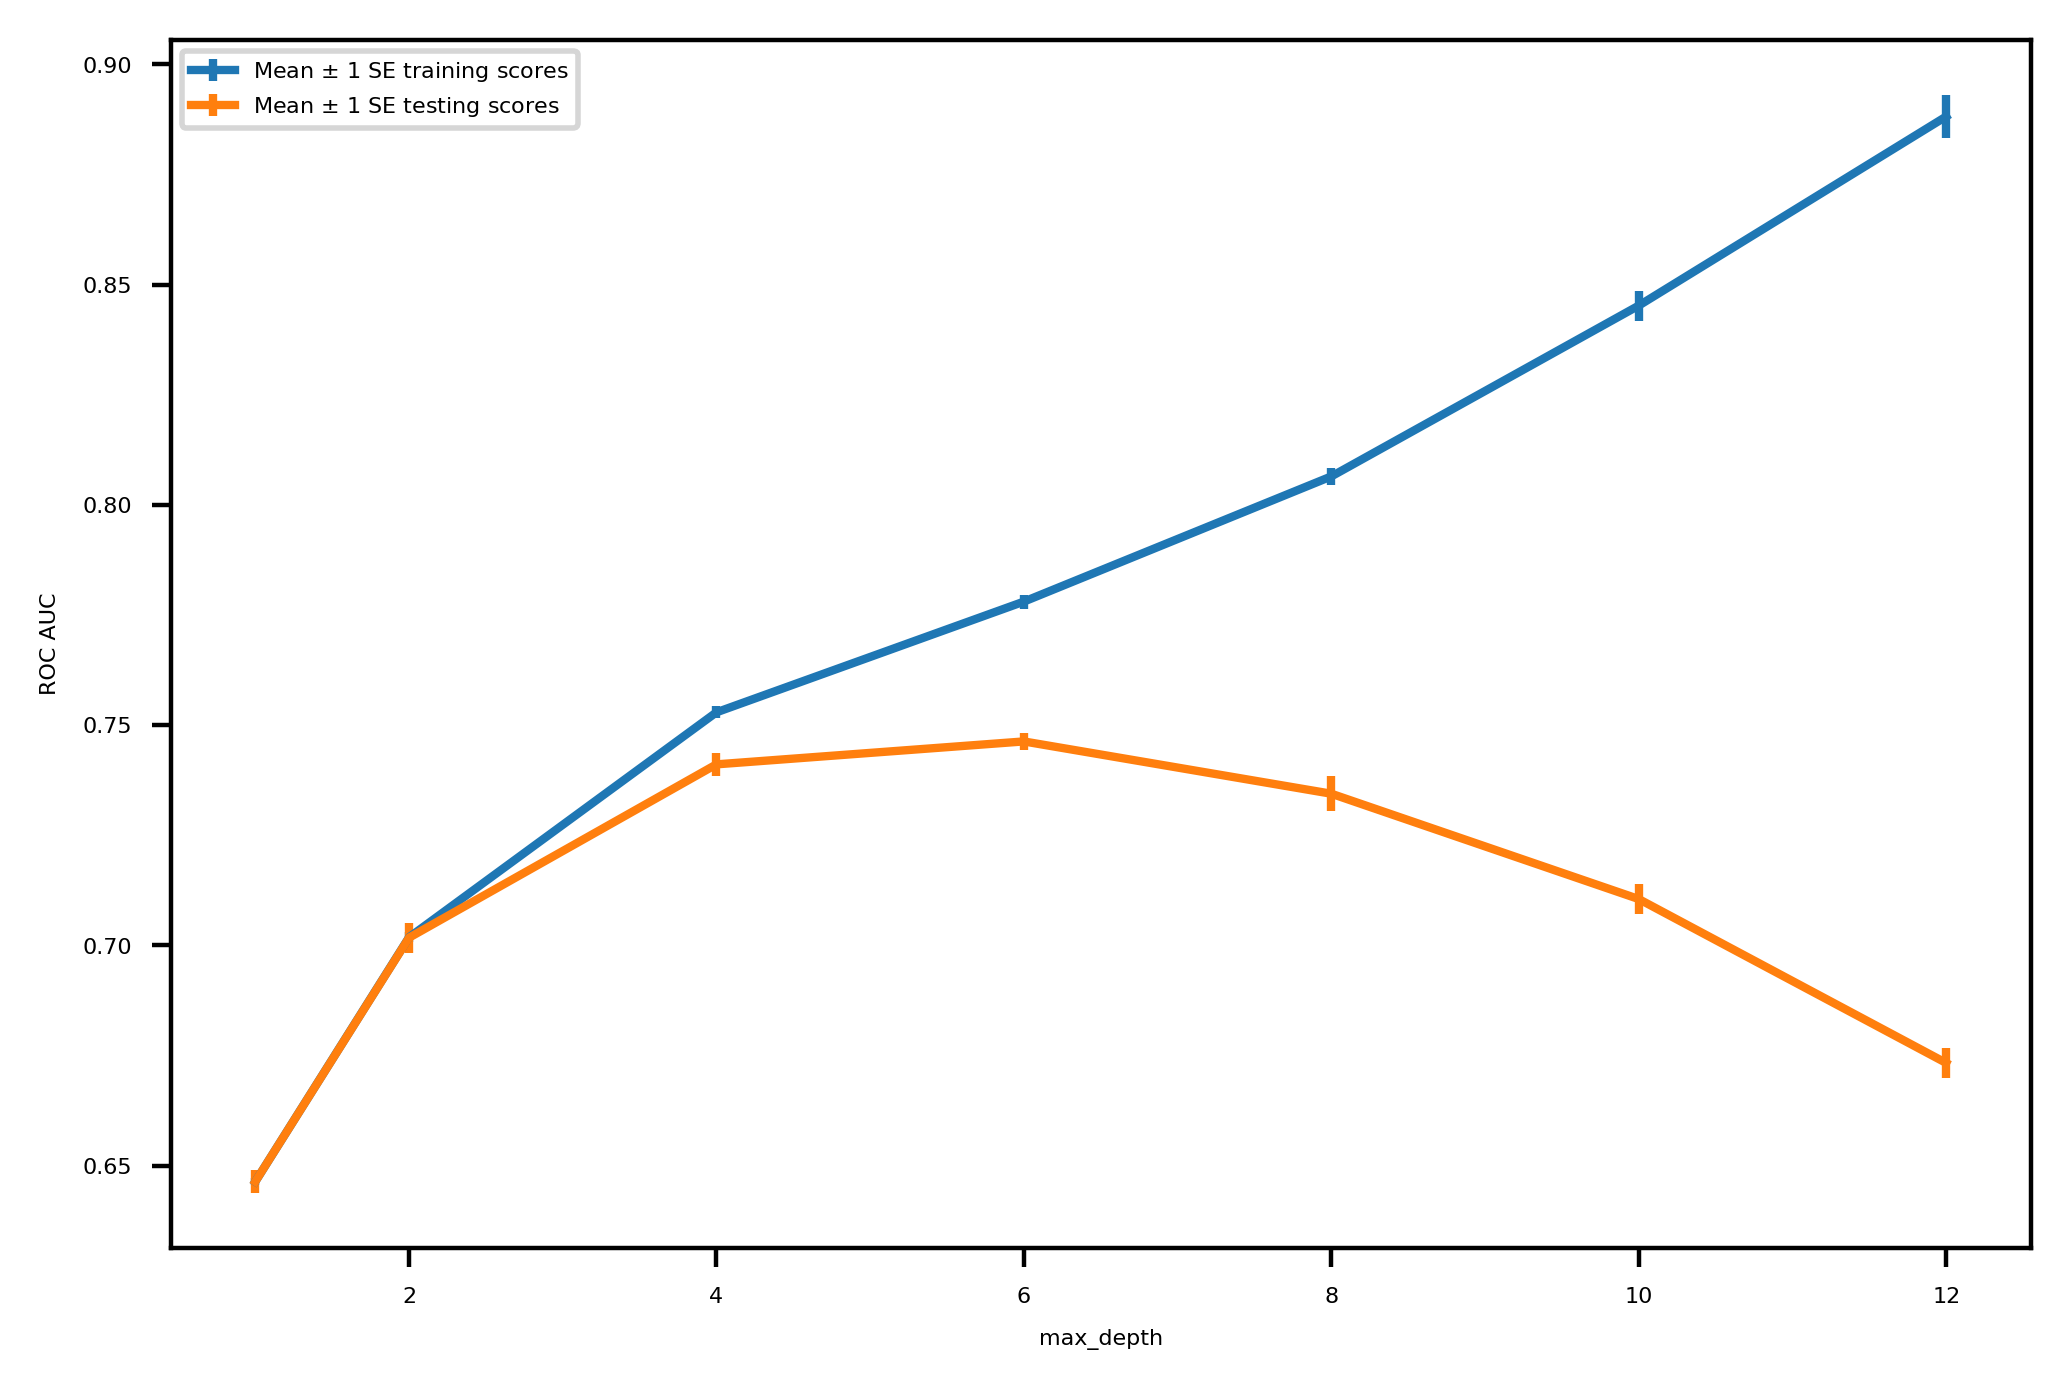

In [130]:
ax = plt.axes()

ax.errorbar(cv_results_df['param_max_depth'], 
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE training scores')

ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE testing scores')

ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

* We can see that as we grow deeper and deeper trees, the
model fits the training data better and better. As noted previously, if we grew trees
deep enough so that each leaf node had just one training sample, we would create
a model that is very specific to the training data. In fact, it would fit the training data
perfectly. We could say that such a model had extremely high variance. it's apparent that increasing **max_depth** only increases
testing scores up to a point, after which deeper trees in fact have lower testing performance. 

* In this case, we would select **max_depth** = 6 ---> so our **mean_test_score** = 0.745, so it is better than 0.738 by engineering interaction features in a logistic regression. Here, we are making gains in model performance